<a href="https://colab.research.google.com/github/guzmanjs/MCD/blob/main/Semestre%201/Gestion%20Estrategica/Clasificacion/tarea_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyecto de aprendizaje surpervisado: Clasificación

Integrantes:

- Luisa F. Giraldo
- Juan S. Guzmán

Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de clasificación. Utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

## 1. Librerías

In [2]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2.Diccionaro de datos

1. country / city
2. age
3. sex
4. chest pain type (4 values)
5. resting blood pressure
6. serum cholestoral in mg/dl
7. fasting blood sugar > 120 mg/dl
8. resting electrocardiographic results (values 0,1,2)
9. maximum heart rate achieved
10. exercise induced angina
11. oldpeak = ST depression induced by exercise relative to rest
12. the slope of the peak exercise ST segment
13. number of major vessels (0-3) colored by flourosopy
14. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
15. target

## 3. Lectura de los datos

In [3]:
df = pd.read_csv(r'DatosCorazon.csv', sep=';', names=['location', 'age', 'sex', 'chestpain_type', 'resting_blood_pressure', 'cholesterol',
                                                      'blood_sugar', 'ekg','max_bpm', 'angina', 'oldpeak', 'peak_slope', 'n_vessels', 'thal', 'target',])
# Mover la columna 'target' a la primera posición
cols = ['target'] + [col for col in df if col != 'target']
df = df[cols]

df

target   location   age  sex  chestpain_type resting_blood_pressure  \
0         0  Cleveland  63.0    1               1                  145.0   
1         2  Cleveland  67.0    1               4                  160.0   
2         1  Cleveland  67.0    1               4                  120.0   
3         0  Cleveland  37.0    1               3                  130.0   
4         0  Cleveland  41.0    0               2                  130.0   
..      ...        ...   ...  ...             ...                    ...   
715       1      Suiza  70.0    1               4                    115   
716       3      Suiza  70.0    1               4                    140   
717       0      Suiza  72.0    1               3                    160   
718       1      Suiza  73.0    0               3                    160   
719       1      Suiza  74.0    1               2                    145   

    cholesterol blood_sugar ekg max_bpm angina oldpeak peak_slope n_vessels  \
0         233.0           1   2   150.0      0     2.3          3         0   
1         286.0           0   2   108.0      1     1.5          2         3   
2         229.0           0   2   129.0      1     2.6          2         2   
3         250.0           0   0   187.0      0     3.5          3         0   
4         204.0           0   2   172.0      0     1.4          1         0   
..          ...         ...  ..     ...    ...     ...        ...       ...   
715           0           0   1      92      1       0          2         ?   
716           0           1   0     157      1       2          2         ?   
717           0           ?   2     114      0     1.6          2         2   
718           0           0   1     121      0       0          1         ?   
719           0           ?   1     123      0     1.3          1         ?   

    thal  
0      6  
1      3  
2      7  
3      3  
4      3  
..   ...  
715    7  
716    7  
717    ?  
718    3  
719    ?  

[720 rows x 15 columns]

## 4. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

### 4.1. Limpieza de los datos

Identificamos tipos de datos y datos faltantes o nulos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  720 non-null    object 
 6   cholesterol             720 non-null    object 
 7   blood_sugar             720 non-null    object 
 8   ekg                     720 non-null    object 
 9   max_bpm                 720 non-null    object 
 10  angina                  720 non-null    object 
 11  oldpeak                 720 non-null    object 
 12  peak_slope              720 non-null    object 
 13  n_vessels               720 non-null    object 
 14  thal                    720 non-null    ob

In [5]:
df.isnull().sum()

target                    0
location                  0
age                       0
sex                       0
chestpain_type            0
resting_blood_pressure    0
cholesterol               0
blood_sugar               0
ekg                       0
max_bpm                   0
angina                    0
oldpeak                   0
peak_slope                0
n_vessels                 0
thal                      0
dtype: int64

Como vemos no existen datos faltantes, pero debemos revisar si existen entradas con datos erróneos o no esperados para la variable.

In [6]:
df.head()

target   location   age  sex  chestpain_type resting_blood_pressure  \
0       0  Cleveland  63.0    1               1                  145.0   
1       2  Cleveland  67.0    1               4                  160.0   
2       1  Cleveland  67.0    1               4                  120.0   
3       0  Cleveland  37.0    1               3                  130.0   
4       0  Cleveland  41.0    0               2                  130.0   

  cholesterol blood_sugar ekg max_bpm angina oldpeak peak_slope n_vessels thal  
0       233.0           1   2   150.0      0     2.3          3         0    6  
1       286.0           0   2   108.0      1     1.5          2         3    3  
2       229.0           0   2   129.0      1     2.6          2         2    7  
3       250.0           0   0   187.0      0     3.5          3         0    3  
4       204.0           0   2   172.0      0     1.4          1         0    3

In [7]:
df.tail()

target location   age  sex  chestpain_type resting_blood_pressure  \
715       1    Suiza  70.0    1               4                    115   
716       3    Suiza  70.0    1               4                    140   
717       0    Suiza  72.0    1               3                    160   
718       1    Suiza  73.0    0               3                    160   
719       1    Suiza  74.0    1               2                    145   

    cholesterol blood_sugar ekg max_bpm angina oldpeak peak_slope n_vessels  \
715           0           0   1      92      1       0          2         ?   
716           0           1   0     157      1       2          2         ?   
717           0           ?   2     114      0     1.6          2         2   
718           0           0   1     121      0       0          1         ?   
719           0           ?   1     123      0     1.3          1         ?   

    thal  
715    7  
716    7  
717    ?  
718    3  
719    ?

Como lo intuimos anteriormente, existen entradas no esperadas para las distintas variables registrando '?', por lo que debemos asegurarnos en cuántas variables estos sucede y cuántas veces por cada una.

In [8]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en location con el valor ?
Existen 3 valores en resting_blood_pressure con el valor ?
Existen 23 valores en cholesterol con el valor ?
Existen 83 valores en blood_sugar con el valor ?
Existen 2 valores en ekg con el valor ?
Existen 2 valores en max_bpm con el valor ?
Existen 2 valores en angina con el valor ?
Existen 6 valores en oldpeak con el valor ?
Existen 207 valores en peak_slope con el valor ?
Existen 413 valores en n_vessels con el valor ?
Existen 320 valores en thal con el valor ?


Como vemos, varias variables que en su naturaleza son numéricas presentan registros con '?'. Vemos que las variables 'peak_slope', 'n_vessel,'thal'  presentan los mayores registros erroneos; sin embargo, al ser datos usados para la predicción de casos médicos, se decide eliminar las variables y no hacer imputaciones de tan alto número de lineas.

In [9]:
df = df.drop(columns=['n_vessels', 'thal'])

Revisamos nuevamente, entradas no esperadas para las distintas variables registrando '?'

In [10]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en location con el valor ?
Existen 3 valores en resting_blood_pressure con el valor ?
Existen 23 valores en cholesterol con el valor ?
Existen 83 valores en blood_sugar con el valor ?
Existen 2 valores en ekg con el valor ?
Existen 2 valores en max_bpm con el valor ?
Existen 2 valores en angina con el valor ?
Existen 6 valores en oldpeak con el valor ?
Existen 207 valores en peak_slope con el valor ?


Definimos un Transformer personalizado que nos cambia los valores ? por nulos

In [11]:
def convert(df,columns,val):
    result = df.copy()
    for col in columns:
        result[col] = result[col].astype(val)
    return result

In [12]:
# Creamos un Transformer personalizado que nos cambia los valores ? por nulos
# Igualmente nos modifica los tipos de variables errados
from sklearn.base import BaseEstimator, TransformerMixin
class Format_variables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.replace('?',np.nan)
        result = convert(result,['resting_blood_pressure','cholesterol','blood_sugar',
            'ekg','max_bpm','angina','oldpeak','peak_slope'],'float64')
        return result

In [13]:
df = Format_variables().fit_transform(df)

In [14]:
# Verificamos que los tipos de datos son los correctos
# Asimismo nos damos cuenta que ahora sí tenemos datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  717 non-null    float64
 6   cholesterol             697 non-null    float64
 7   blood_sugar             637 non-null    float64
 8   ekg                     718 non-null    float64
 9   max_bpm                 718 non-null    float64
 10  angina                  718 non-null    float64
 11  oldpeak                 714 non-null    float64
 12  peak_slope              513 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 73.2+ KB


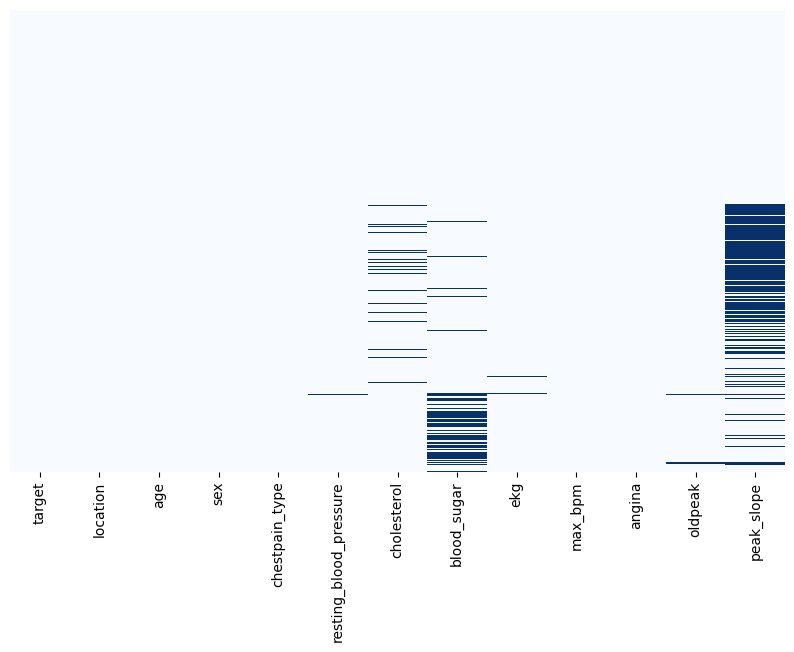

In [15]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Antes de meternos la limpieza de datos debemos ver como están distribuidas las categorías de la clase objetivo symboling. Es importante conocer si nuestro conjunto de datos se encuentra balanceado o no.

<Axes: xlabel='target', ylabel='count'>

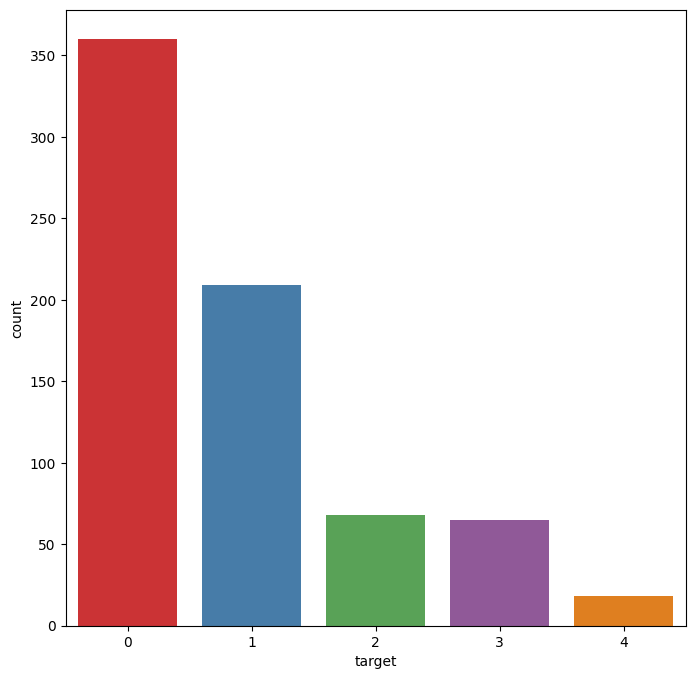

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(x="target", data=df, palette = "Set1")

In [17]:
df['target'][df['target'] == 0].count()/df.shape[0]*100

50.0

Partimos de un baseline del 50%

Previo a la inputación de datos, revisamos histogramas de los registros de cada variable, con el fin de visualizar el comportamiento de los datos y qué rango de valores toman, esto nos permitirá también la identificación de variables binarias.

In [18]:
# Función para graficar histogramas
def histograma_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:

        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))

    plt.show()

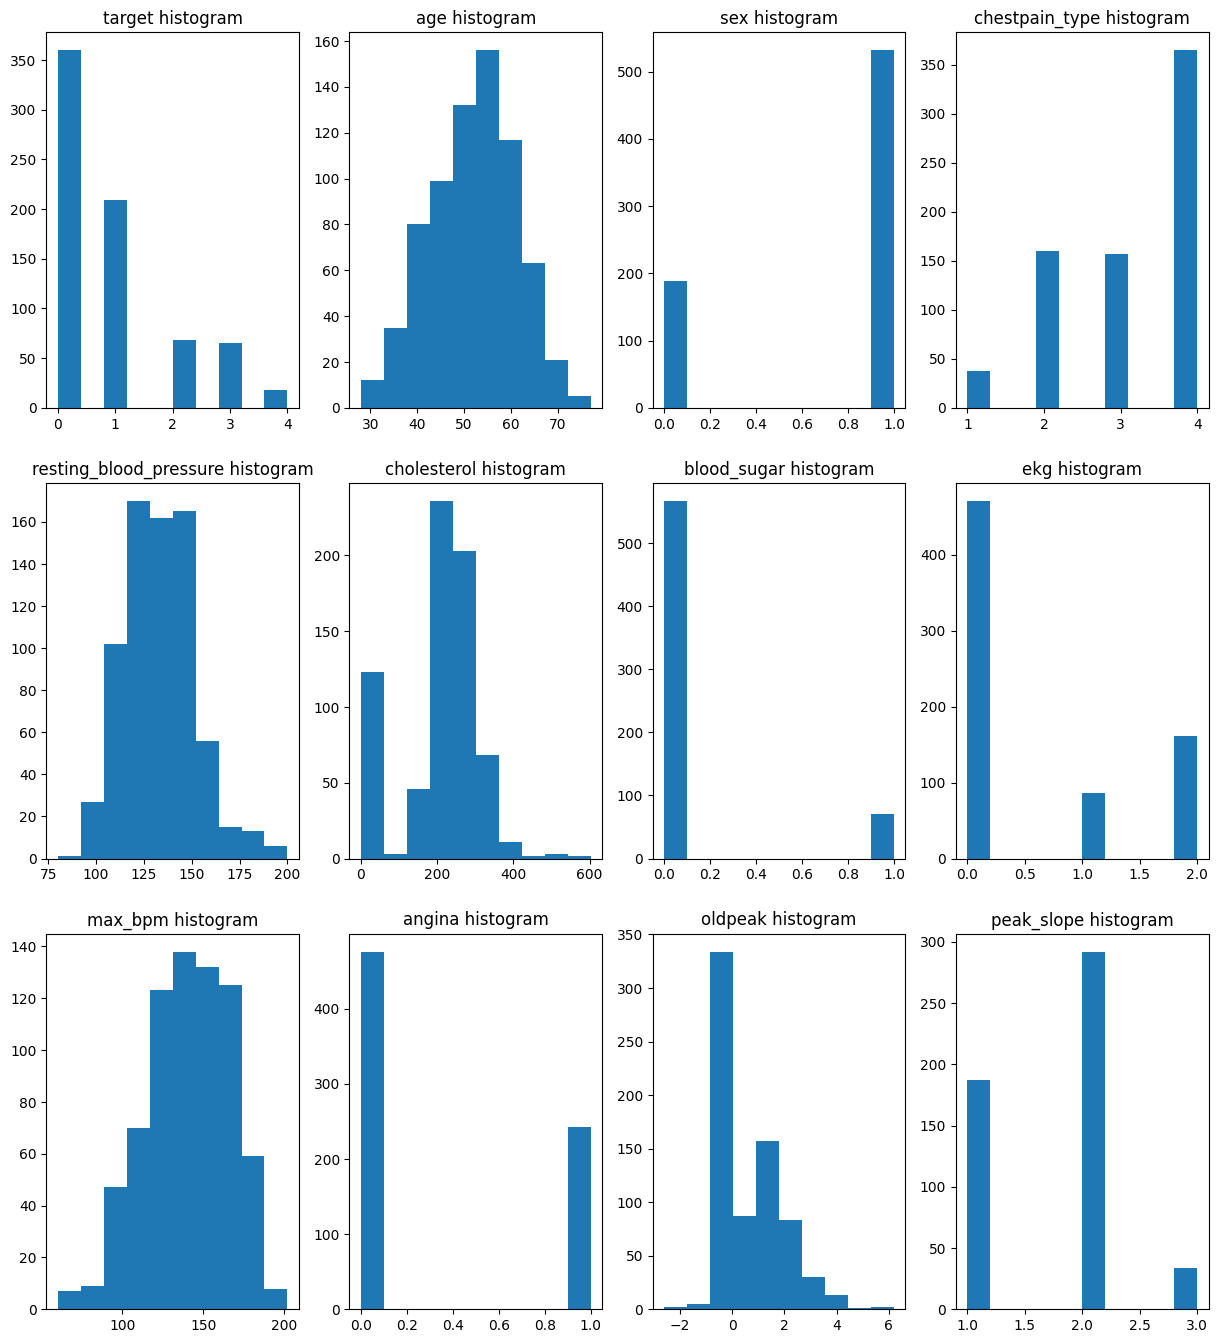

In [19]:
histograma_visual(df)

Como podemos deducir de la información graficada en los histogramas,y tomando la información del diccionario de datos, se concluye que las siguientes variables son categóricas; <br>

*   blood_sugar: Toma valores "0" y "1"<br>
*   sex: Toma valores  "0" y "1"<br>
*   Chestpain: Toma valores "1", "2", "3" ó "4"<br>
*   angina: Toma valores de "0" ó "1"<br>
*   peak_slope: Toma valores   "1", "2" ó "3" <br>
*   ekg: Toma valores   "0", "1" ó "2" <br>








A continuación, se define un transformador para la imputación de datos, utilizando la media para las columnas numéricas y la moda para las variables categóricas previamente identificadas.

Es importante destacar que esta imputación se realiza con fines académicos. En el contexto de datos médicos, en una aplicación práctica, es crucial contar con la evaluación y el aval de un experto médico para asegurar la validez y precisión de los transformadores utilizados en la imputación.

In [20]:
# Creamos un Transformer personalizado que nos imputa los valores faltantes
# Utiliza la media para columnas numéricas y la moda para las categóricas
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, cont, cat):
        self.cont = cont
        self.cat = cat

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for c in self.cont:
            avg = result[c].mean(axis=0)
            result[c].replace(np.nan,avg,inplace=True)
        for c in self.cat:
            mode = result[c].value_counts().idxmax()
            result[c].replace(np.nan,mode,inplace=True)
        return result

In [21]:
cont = ['resting_blood_pressure', 'cholesterol', 'max_bpm',  'oldpeak']

cat =  ['blood_sugar', 'angina', 'peak_slope', 'ekg']

df = Imputer(cont,cat).fit_transform(df)


In [22]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  720 non-null    float64
 6   cholesterol             720 non-null    float64
 7   blood_sugar             720 non-null    float64
 8   ekg                     720 non-null    float64
 9   max_bpm                 720 non-null    float64
 10  angina                  720 non-null    float64
 11  oldpeak                 720 non-null    float64
 12  peak_slope              720 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 73.2+ KB


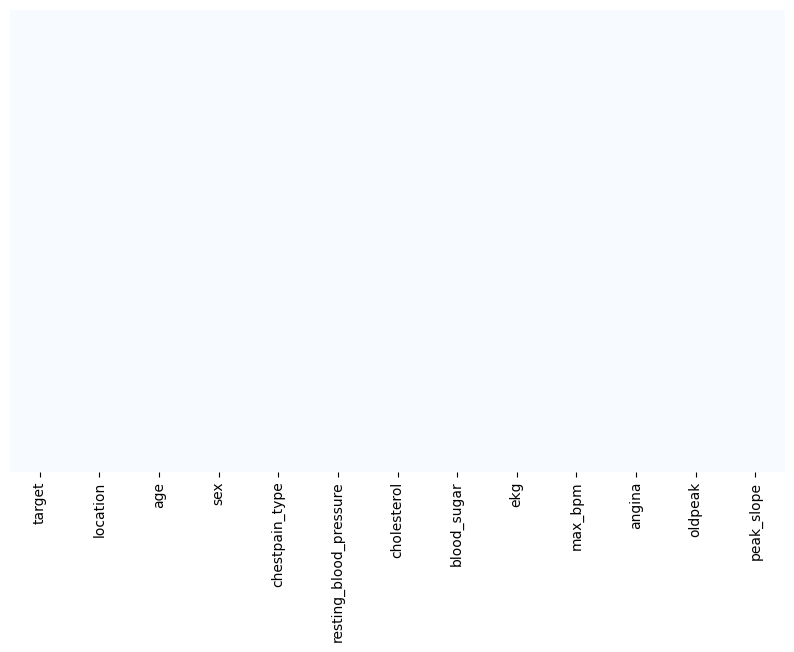

In [23]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Observamos que ya no contamos con valores faltantes.

#### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [24]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))

    plt.show()

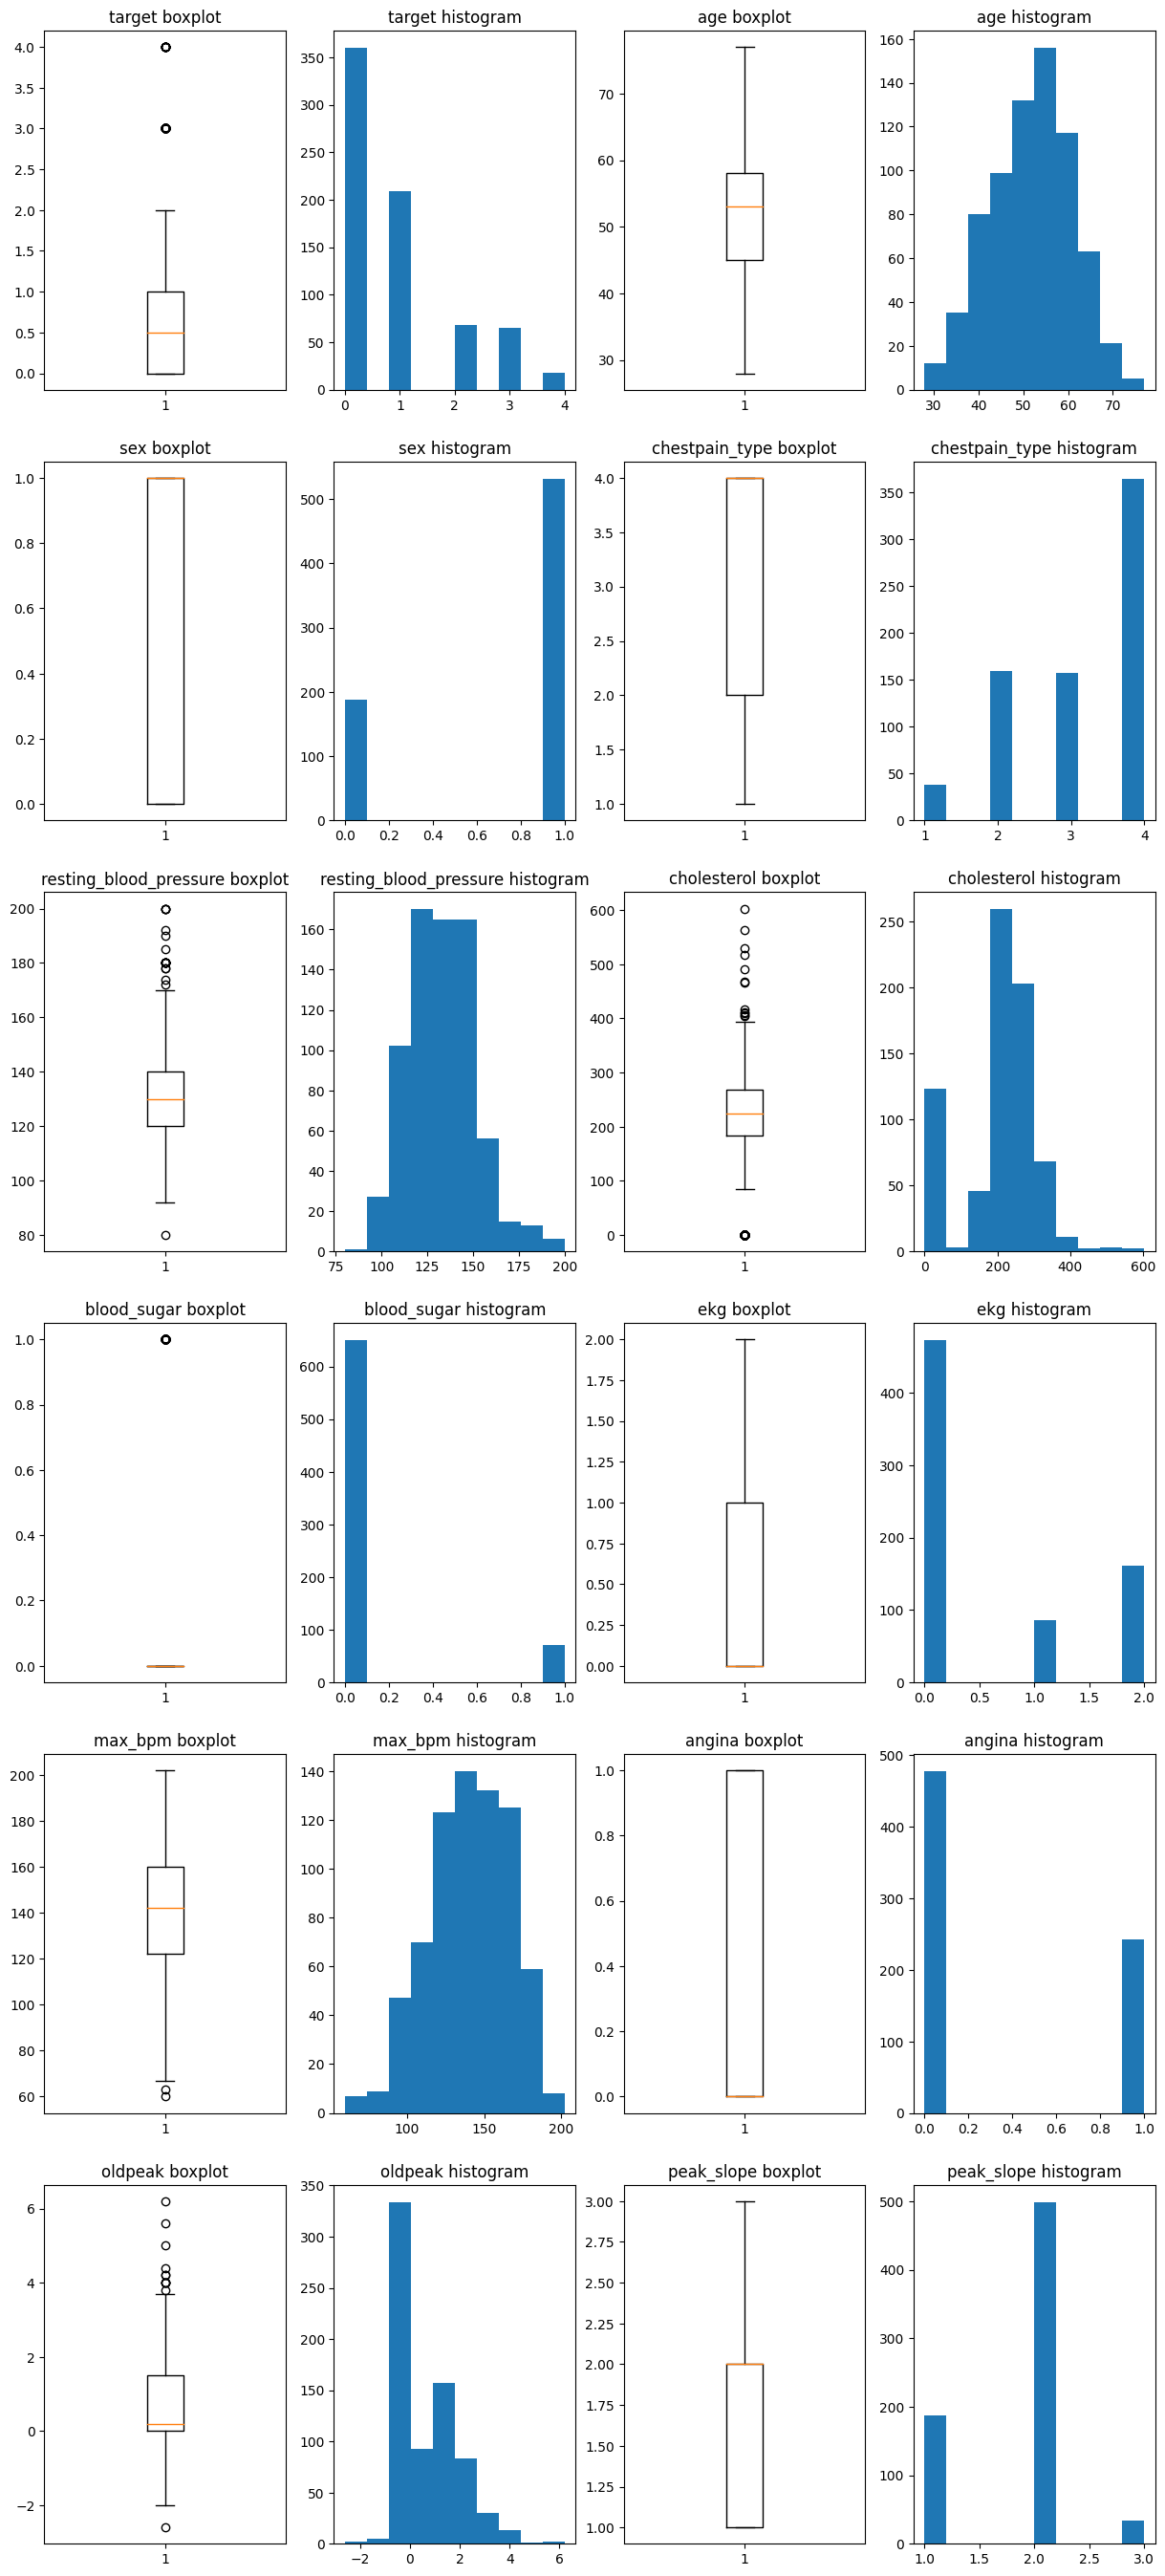

In [25]:
outliers_visual(df)

Utilizando los gráficos anteriores podemos observar las distribuciones para cada variable continua.

Visualmente resulta claro que existen outliers para algunas de las variables dentro del dataset:



*   resting_blood_pressure
*   cholesterol
*   max_bpm
*   oldpeak

<br>
Podemos corroborar lo anterior de manera estadística haciendo uso del método de Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil)

In [26]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [27]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df.select_dtypes('number').columns):
    if outlier_count(col, df) > 0:
        cont_vars.append(col)

---------------target---------------
Number of outliers: 83
Percent of data that is outlier: 11.53%
---------------age---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------sex---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------chestpain_type---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------resting_blood_pressure---------------
Number of outliers: 22
Percent of data that is outlier: 3.06%
---------------cholesterol---------------
Number of outliers: 135
Percent of data that is outlier: 18.75%
---------------blood_sugar---------------
Number of outliers: 70
Percent of data that is outlier: 9.72%
---------------ekg---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------max_bpm---------------
Number of outliers: 2
Percent of data that is outlier: 0.28%
---------------angina---------------
Number of outliers: 0
Percent of data that is outlie

 Limitaremos a través de winsorizing

In [28]:
from scipy.stats.mstats import winsorize

wins_dict = {}

def test_wins(col, df, wins_dict, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
    return wins_dict

In [29]:
df.describe()

target         age         sex  chestpain_type  \
count  720.000000  720.000000  720.000000      720.000000   
mean     0.850000   51.888889    0.738889        3.179167   
std      1.076878    9.193720    0.439546        0.953646   
min      0.000000   28.000000    0.000000        1.000000   
25%      0.000000   45.000000    0.000000        2.000000   
50%      0.500000   53.000000    1.000000        4.000000   
75%      1.000000   58.000000    1.000000        4.000000   
max      4.000000   77.000000    1.000000        4.000000   

       resting_blood_pressure  cholesterol  blood_sugar         ekg  \
count              720.000000   720.000000   720.000000  720.000000   
mean               131.804742   204.774749     0.097222    0.566667   
std                 18.490635   107.513156     0.296466    0.832911   
min                 80.000000     0.000000     0.000000    0.000000   
25%                120.000000   184.000000     0.000000    0.000000   
50%                130.000000   225.000000     0.000000    0.000000   
75%                140.000000   269.000000     0.000000    1.000000   
max                200.000000   603.000000     1.000000    2.000000   

          max_bpm      angina     oldpeak  peak_slope  
count  720.000000  720.000000  720.000000  720.000000  
mean   140.565460    0.336111    0.789636    1.787500  
std     25.611477    0.472706    1.062500    0.512008  
min     60.000000    0.000000   -2.600000    1.000000  
25%    122.000000    0.000000    0.000000    1.000000  
50%    142.000000    0.000000    0.200000    2.000000  
75%    160.000000    1.000000    1.500000    2.000000  
max    202.000000    1.000000    6.200000    3.000000

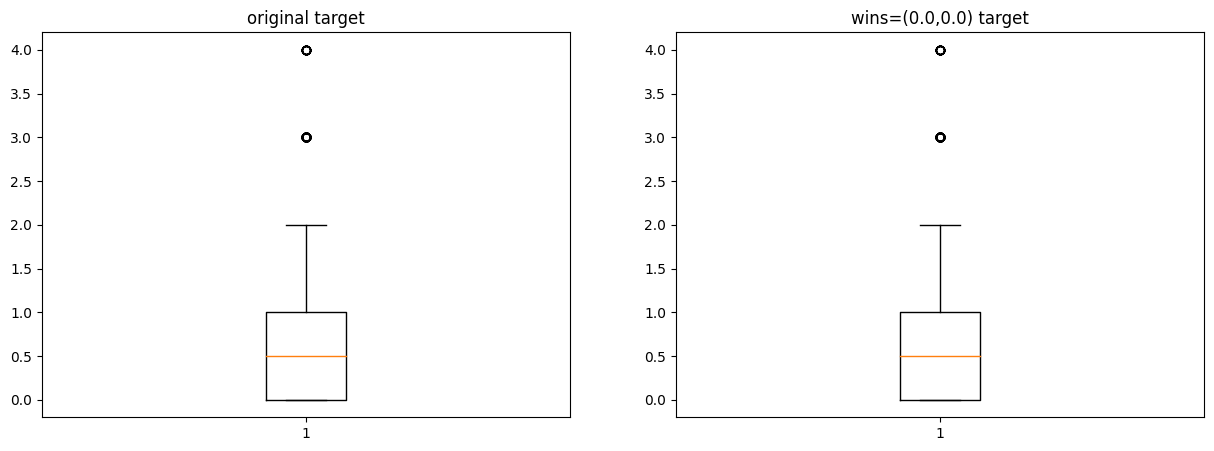

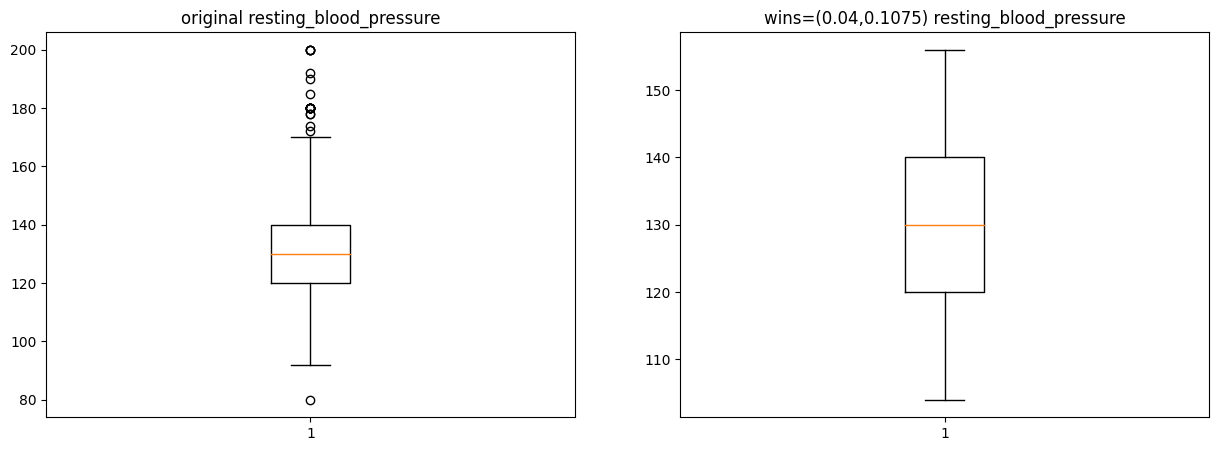

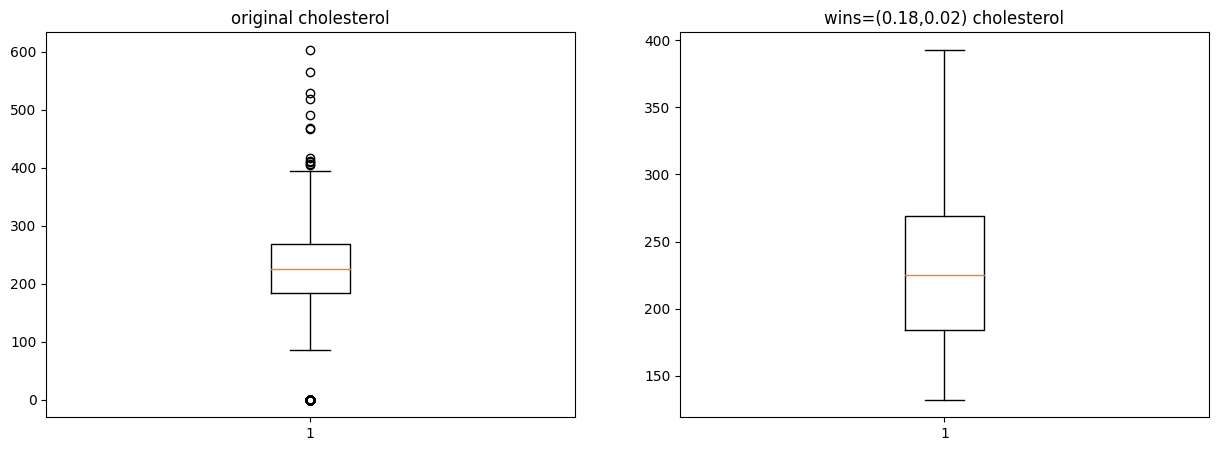

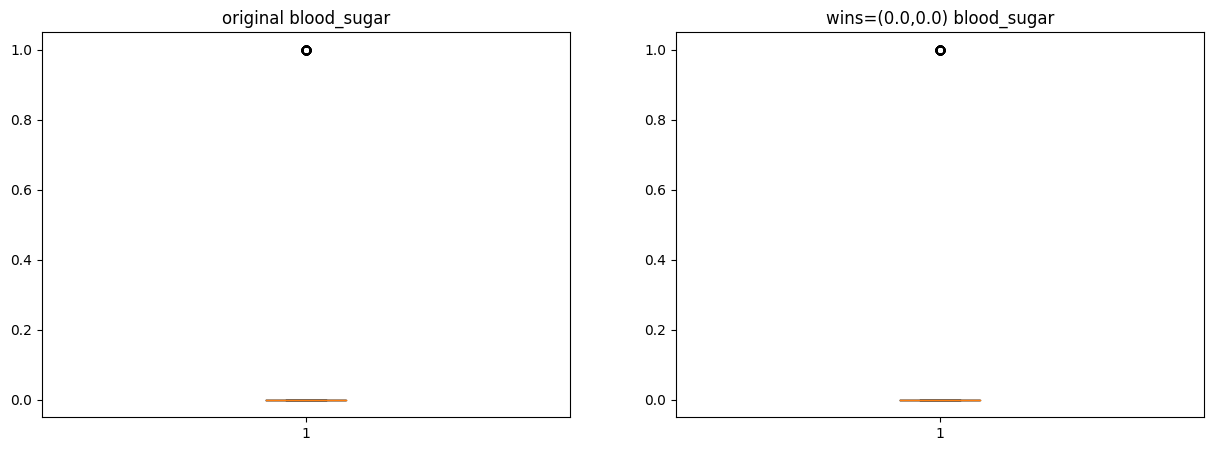

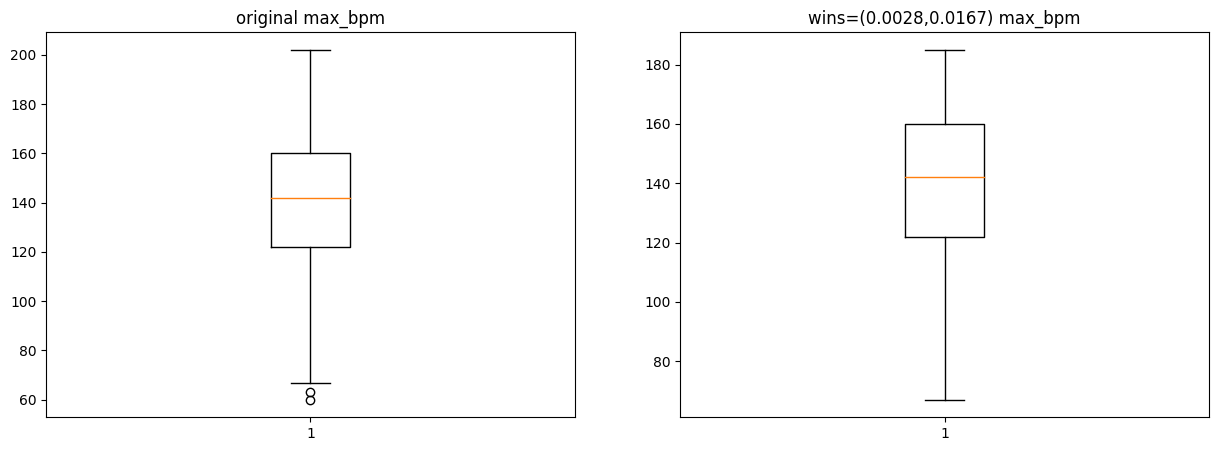

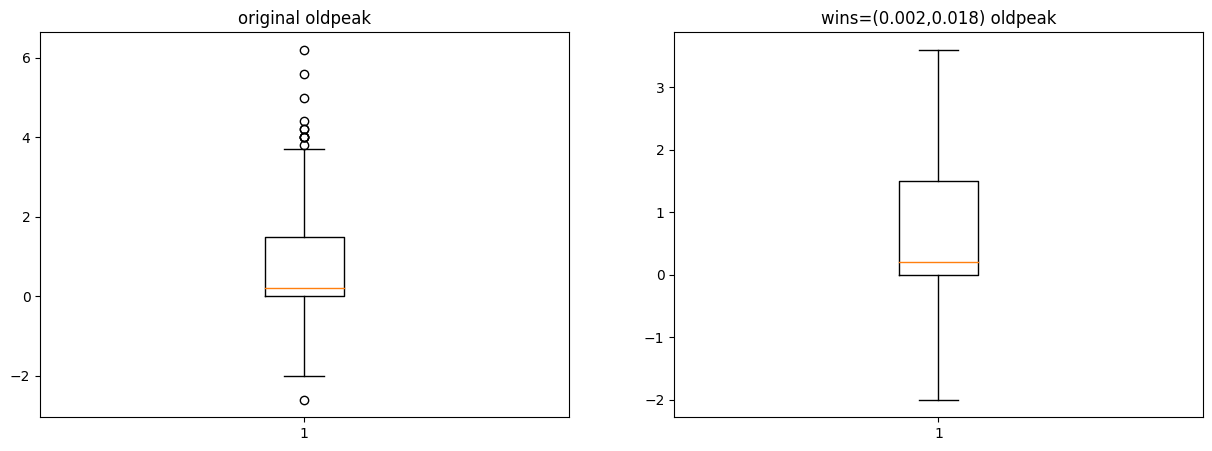

In [30]:

# Verificación de la Winsorizing
wins_dict = {}

wins_dict = test_wins(cont_vars[0], df, wins_dict, lower_limit=.0, upper_limit=.0, show_plot=True) #target - no se transforma el output al ser la variable objetivo
wins_dict = test_wins(cont_vars[1], df, wins_dict, lower_limit=.04, upper_limit=.1075, show_plot=True) #resting_bloodpressure
wins_dict = test_wins(cont_vars[2], df, wins_dict, lower_limit=0.18, upper_limit=.02, show_plot=True) #cholesterol
wins_dict = test_wins(cont_vars[3], df, wins_dict, lower_limit=.0, upper_limit=.0, show_plot=True) #blood_sugar
wins_dict = test_wins(cont_vars[4], df, wins_dict, lower_limit=.0028, upper_limit=.0167, show_plot=True) #max_bpm
wins_dict = test_wins(cont_vars[5], df, wins_dict, lower_limit=.002, upper_limit=.018, show_plot=True) #oldpeak


In [31]:
# Creamos un Transformer personalizado para limitar los outliers con el winsorizing
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, wins, cont_vars):
        self.wins = wins
        self.cont_vars = cont_vars

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for col in cont_vars:
            result[col] = self.wins[col]
        return result

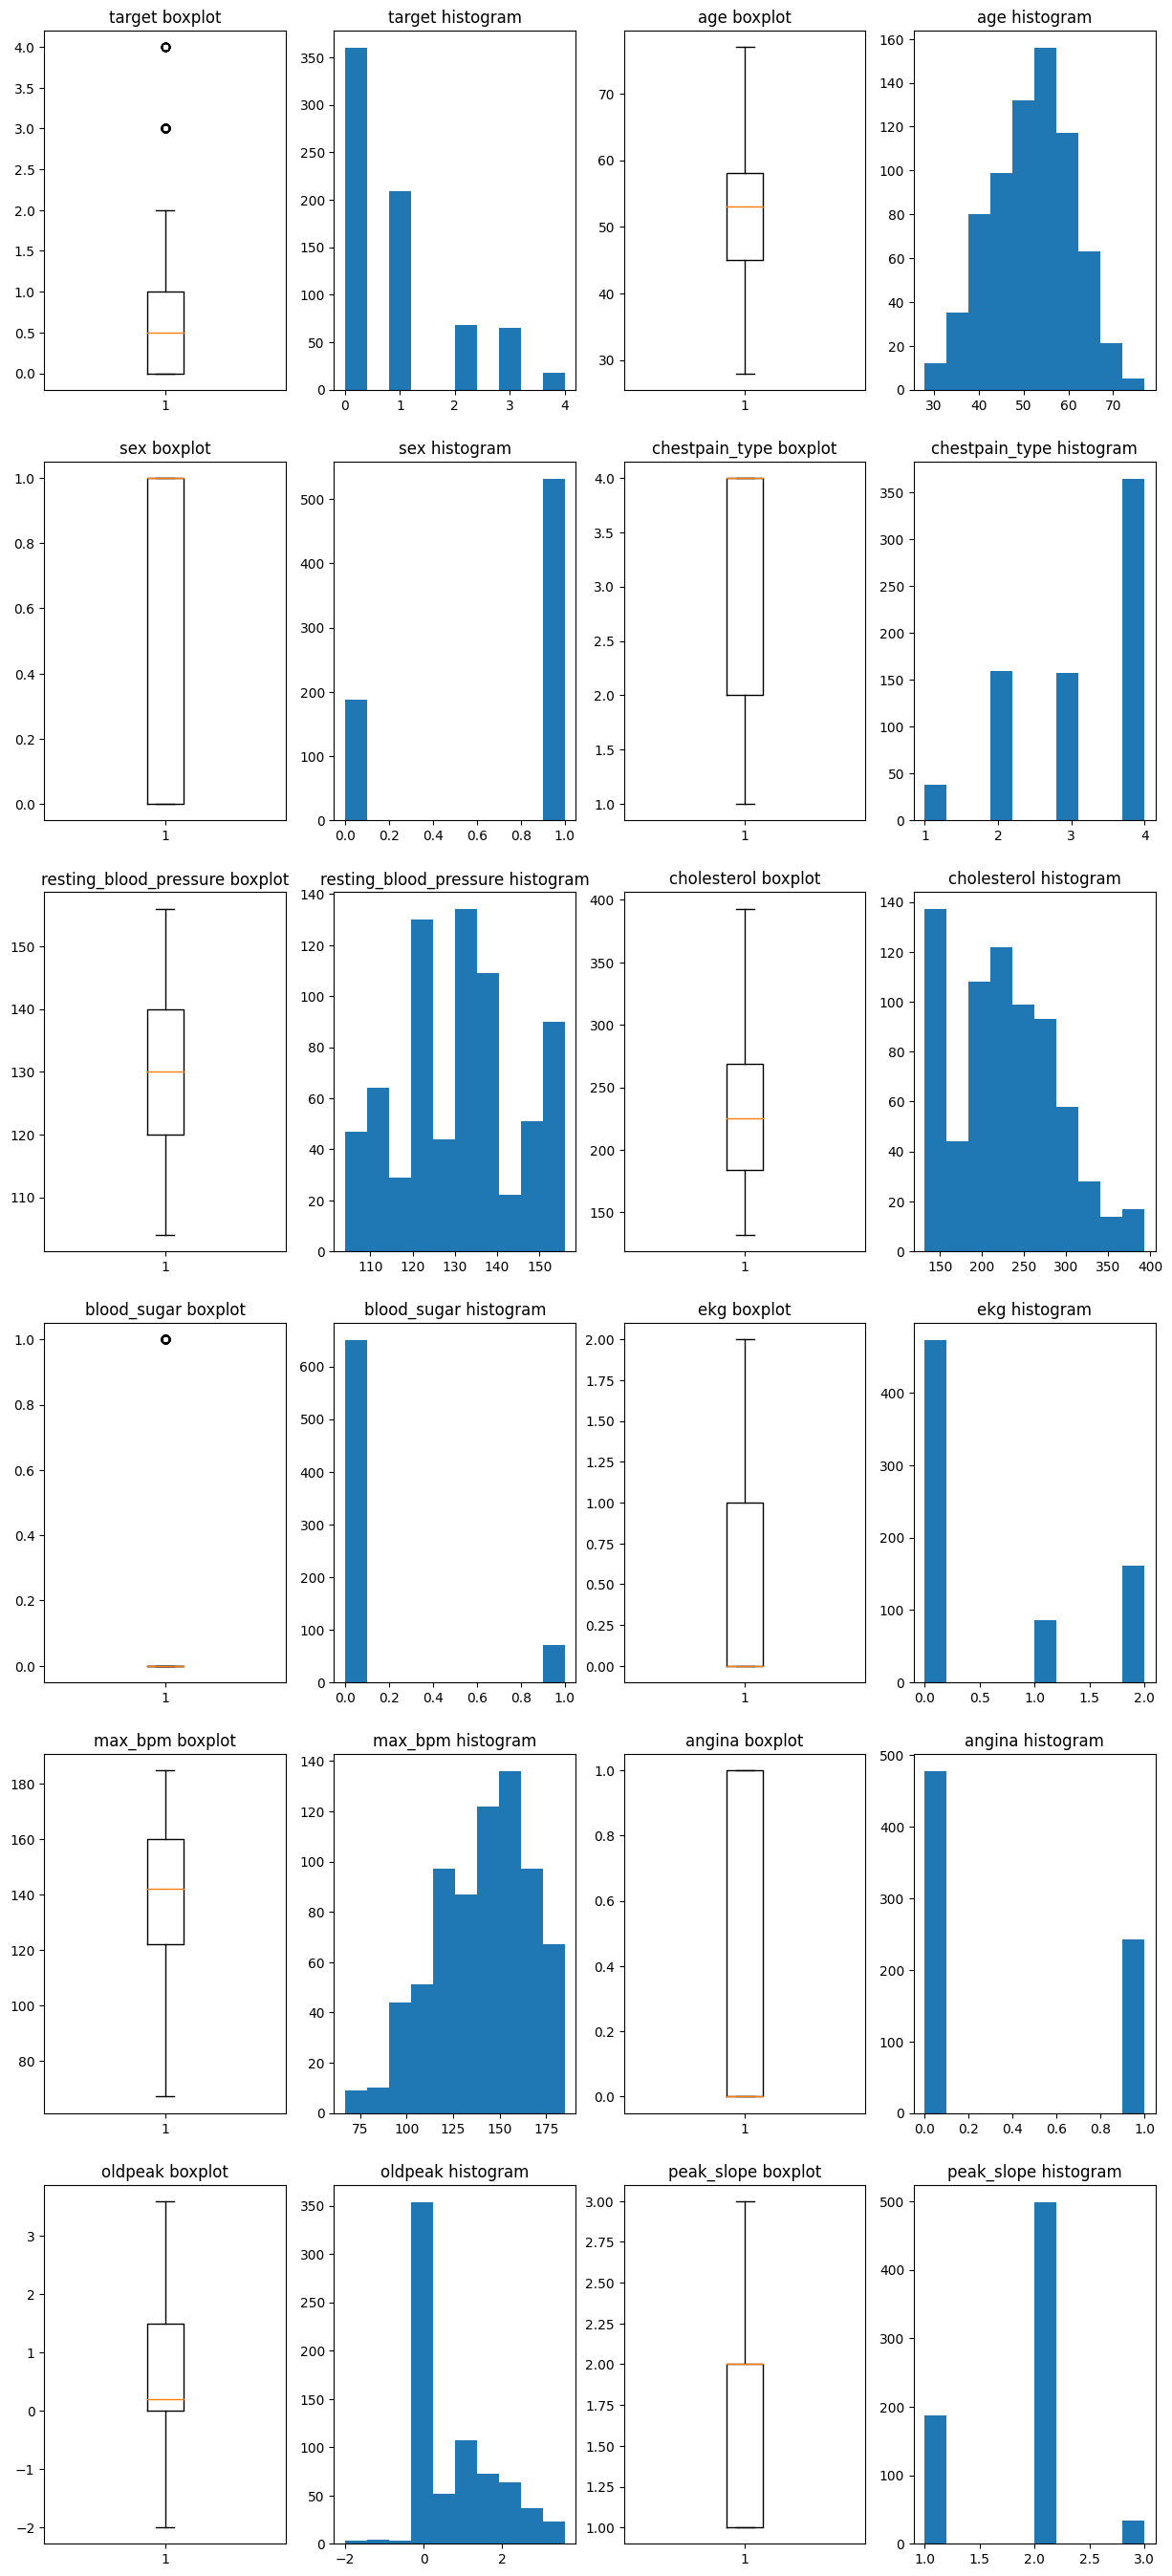

In [32]:
df_wins = Winsorizer(wins_dict,cont_vars).fit_transform(df)
outliers_visual(df_wins)

### 4.2 Exploración de datos

#### Análisis univariado

In [33]:
# Descriptores estadísticos para valores categóricos
# Convertir las columnas a tipo 'category'
for column in cat:
    df_wins[column] = df_wins[column].astype('category')

# Seleccionar las columnas categóricas específicas
categorical_df = df_wins[cat]
numeric_df = df_wins[cont]

# Descriptores estadísticos para valores continuos
categorical_df.describe(include='all')

blood_sugar  angina  peak_slope    ekg
count         720.0   720.0       720.0  720.0
unique          2.0     2.0         3.0    3.0
top             0.0     0.0         2.0    0.0
freq          650.0   478.0       499.0  473.0

In [34]:
# Descriptores estadísticos para valores continuos
numeric_df.describe()

resting_blood_pressure  cholesterol     max_bpm     oldpeak
count              720.000000   720.000000  720.000000  720.000000
mean               130.763075   226.116416  140.493237    0.776719
std                 15.251646    64.183239   25.396644    1.012742
min                104.000000   132.000000   67.000000   -2.000000
25%                120.000000   184.000000  122.000000    0.000000
50%                130.000000   225.000000  142.000000    0.200000
75%                140.000000   269.000000  160.000000    1.500000
max                156.000000   393.000000  185.000000    3.600000

In [35]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(10, 15))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

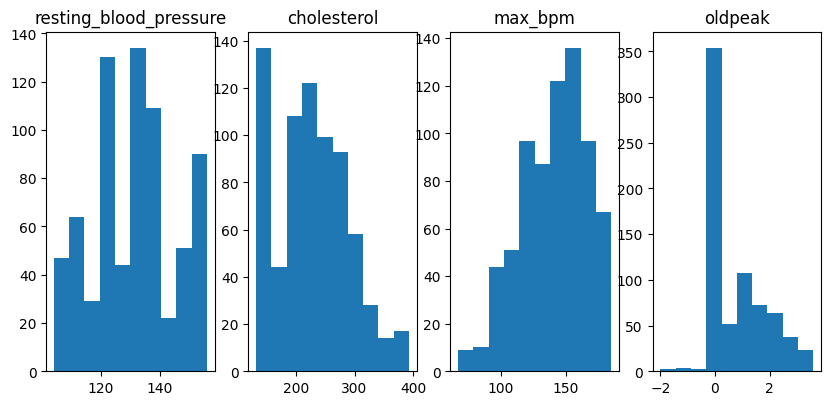

In [36]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(numeric_df)

Text(0.5, 0, 'blood_sugar')

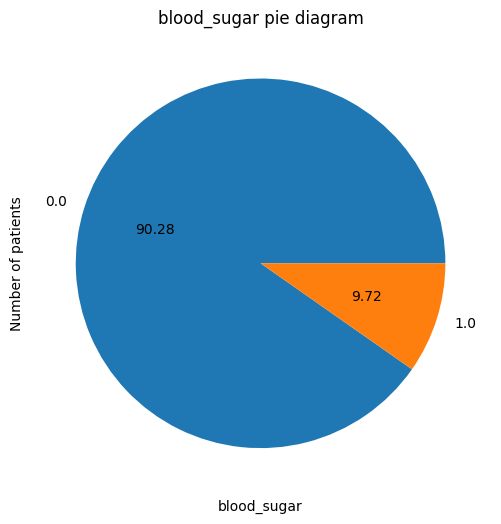

In [37]:
df_wins['blood_sugar'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("blood_sugar pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('blood_sugar')

Text(0.5, 0, 'sex')

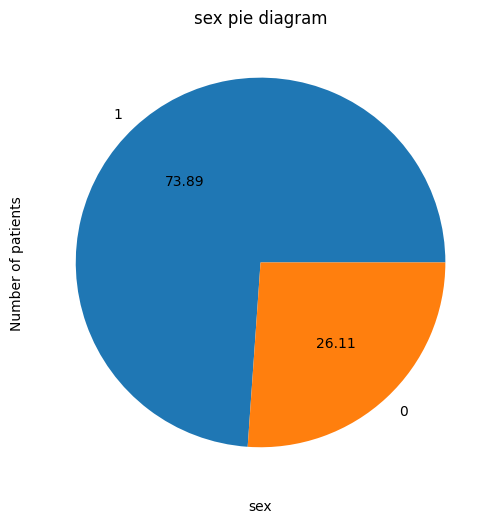

In [38]:
df_wins['sex'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("sex pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('sex')

Text(0.5, 0, 'angina')

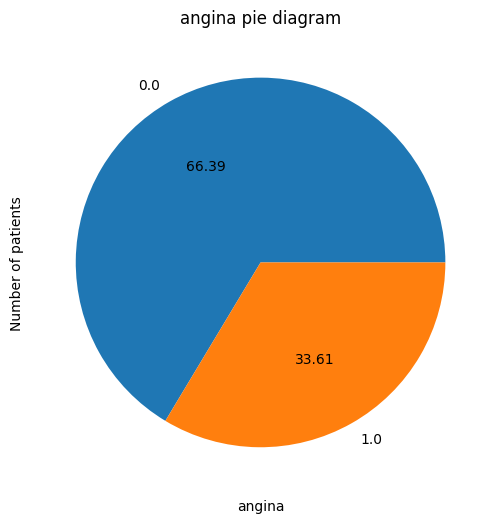

In [39]:
df_wins['angina'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("angina pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('angina')

Text(0.5, 0, 'peak_slope')

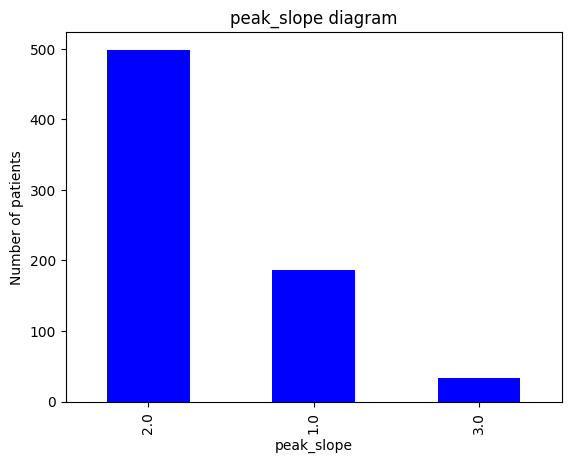

In [40]:
df_wins['peak_slope'].value_counts().plot(kind='bar',color='blue')
plt.title("peak_slope diagram")
plt.ylabel('Number of patients')
plt.xlabel('peak_slope')


Text(0.5, 0, 'ekg')

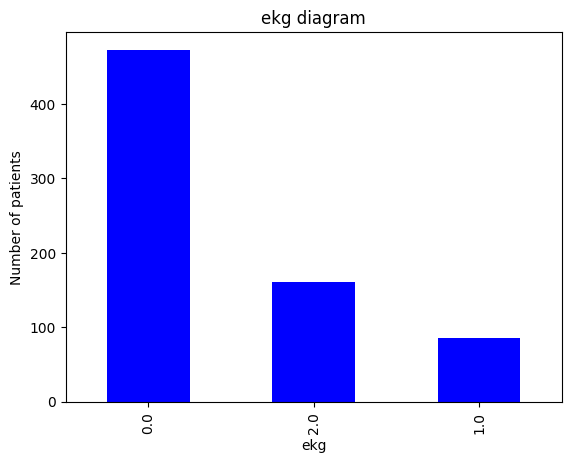

In [41]:
df_wins['ekg'].value_counts().plot(kind='bar',color='blue')
plt.title("ekg diagram")
plt.ylabel('Number of patients')
plt.xlabel('ekg')

#### Resumen

* Vemos que la mayoría de los pacientes presentar niveles menores a 120mg de azúcar en sangre, así como la mayoría se ubica en el primer nivel según su registro de electrocardiograma (ekg).
* La mayoría de pacientes registrados son masculinos, representando cerca del 74% de los individuos.
* Las variables 'cholesterol' y 'max_bpm' presentan sesgos a la izquierda y a la derecha, respectivamente.





#### Análisis Bivariado

Haciendo uso del diagrama de cajas y bigotes obtendremos un resumen visual de la distribución de cada una de las variables independientes con respecto a la dependiente, observando así la distribución de los distintos grupos.

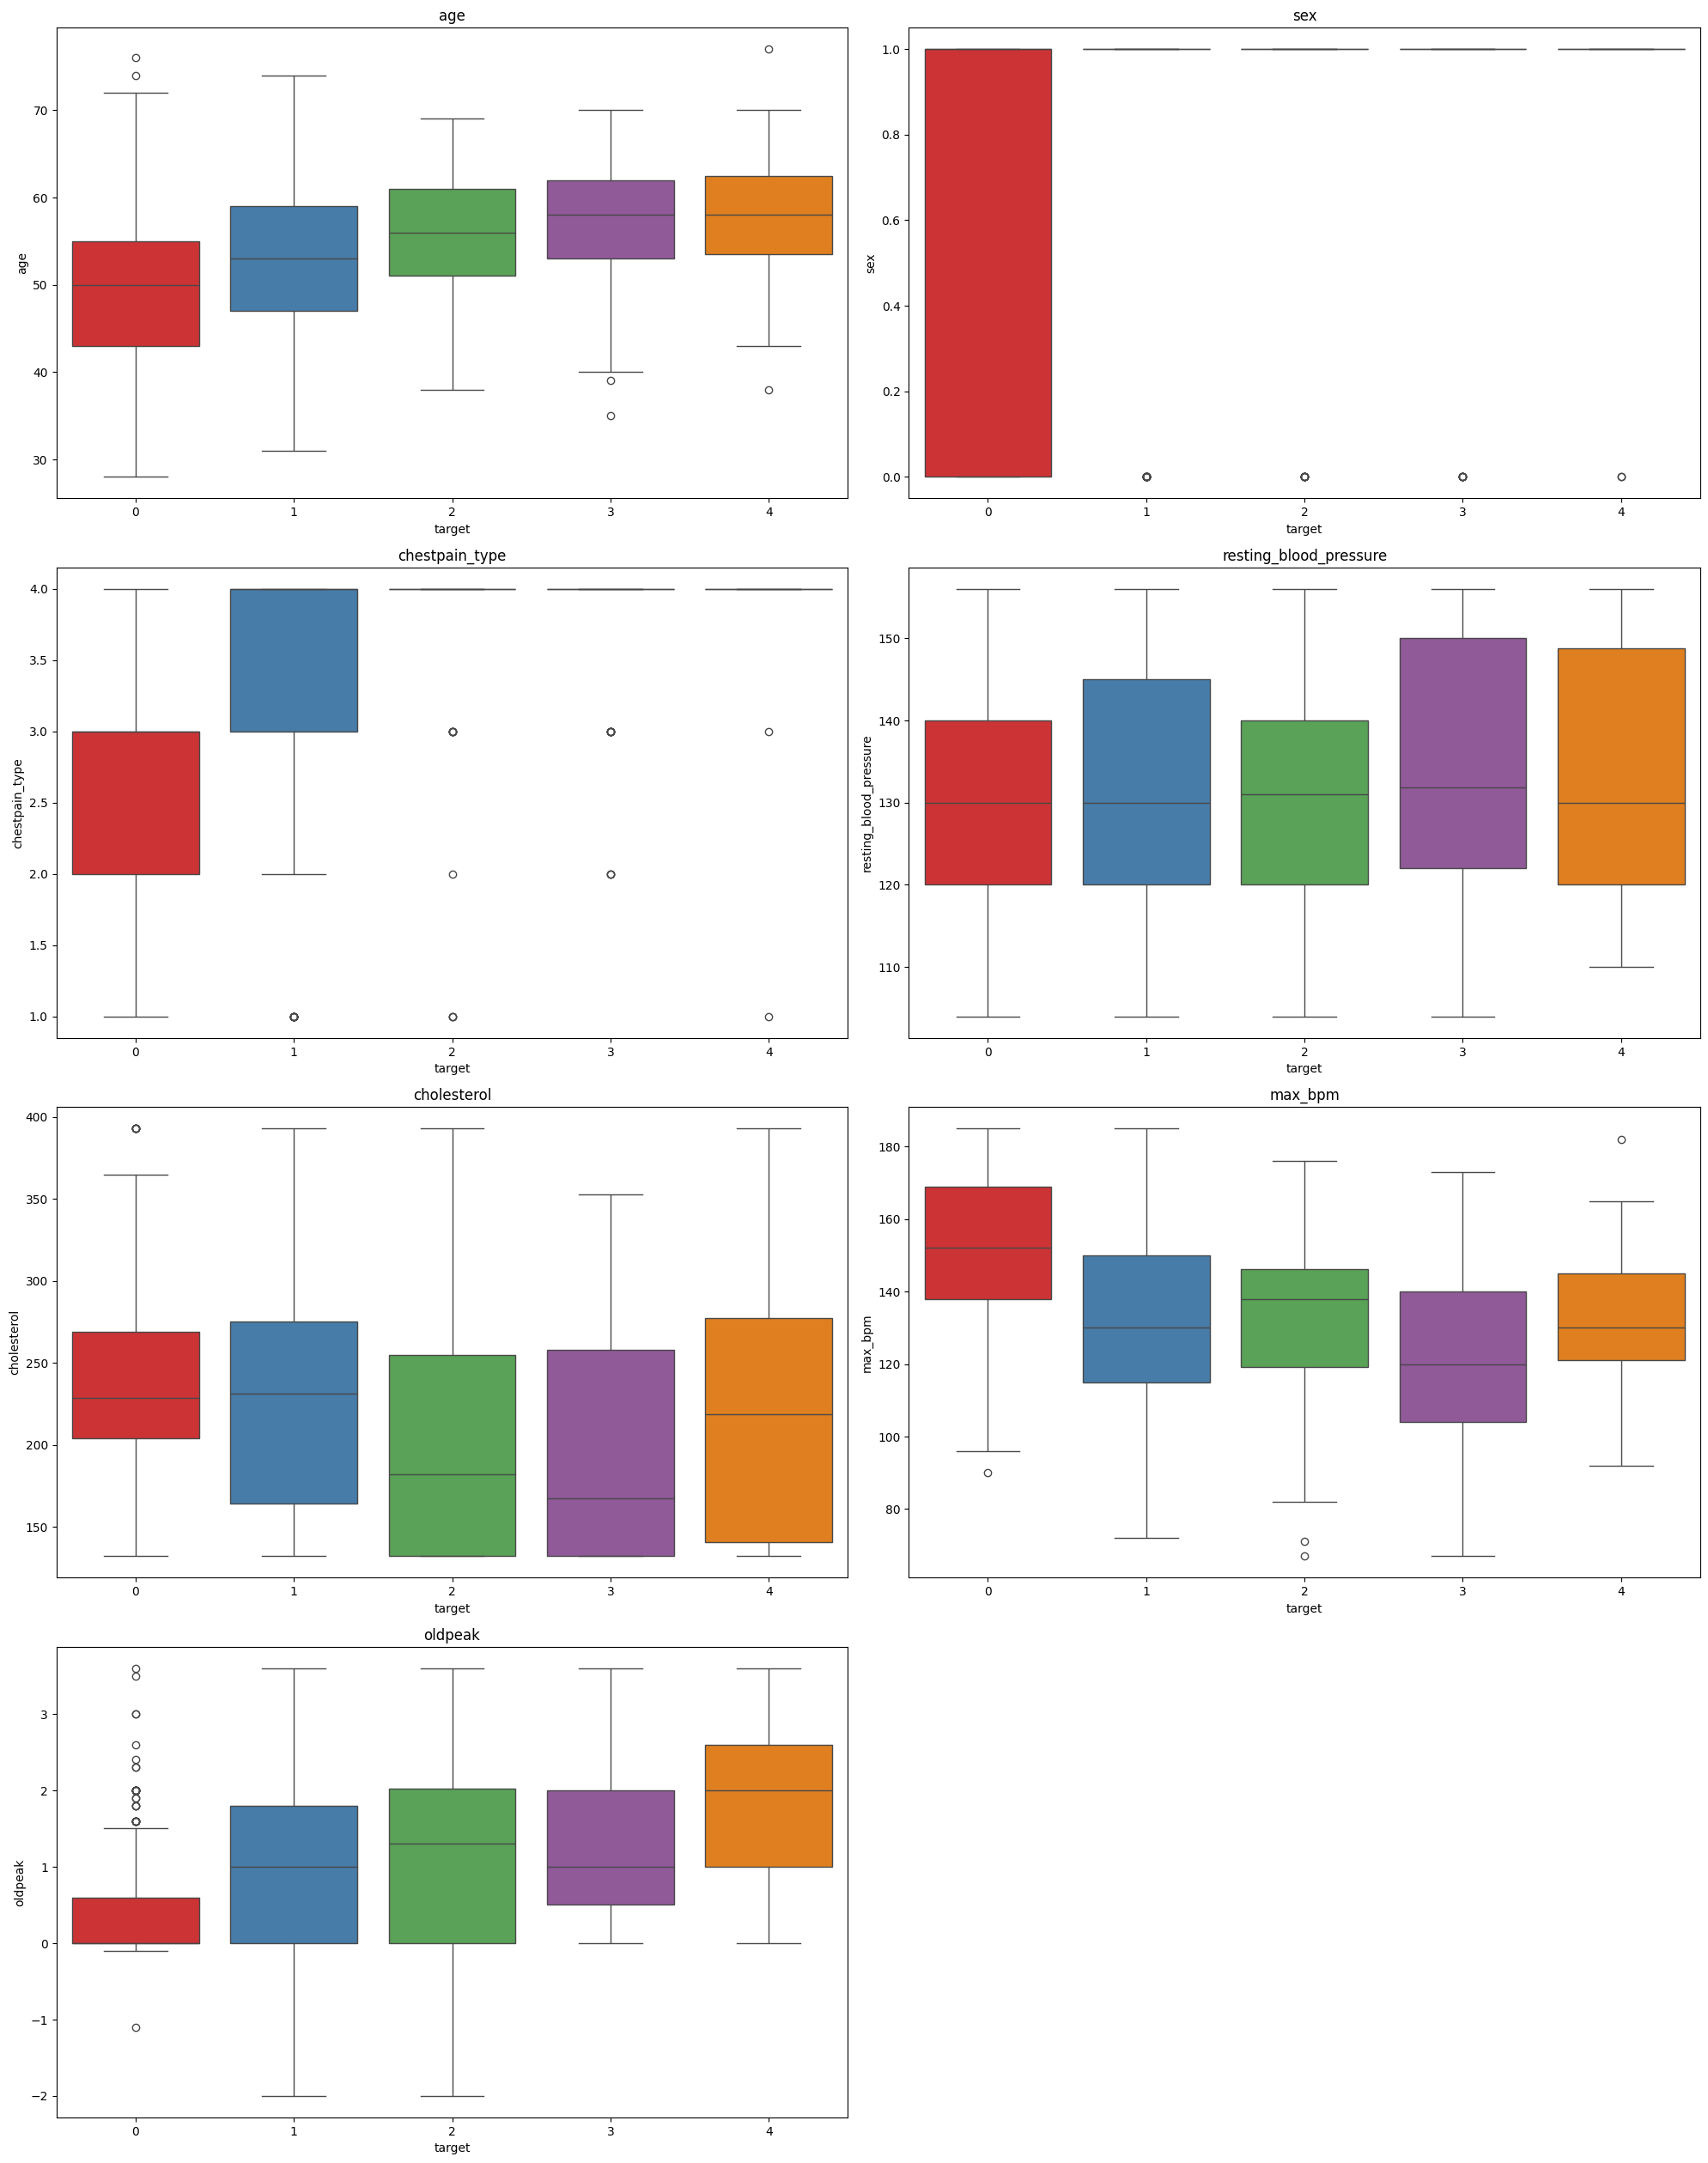

In [42]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.drop(columns='target').select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.boxplot(x=df_wins.columns[0], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

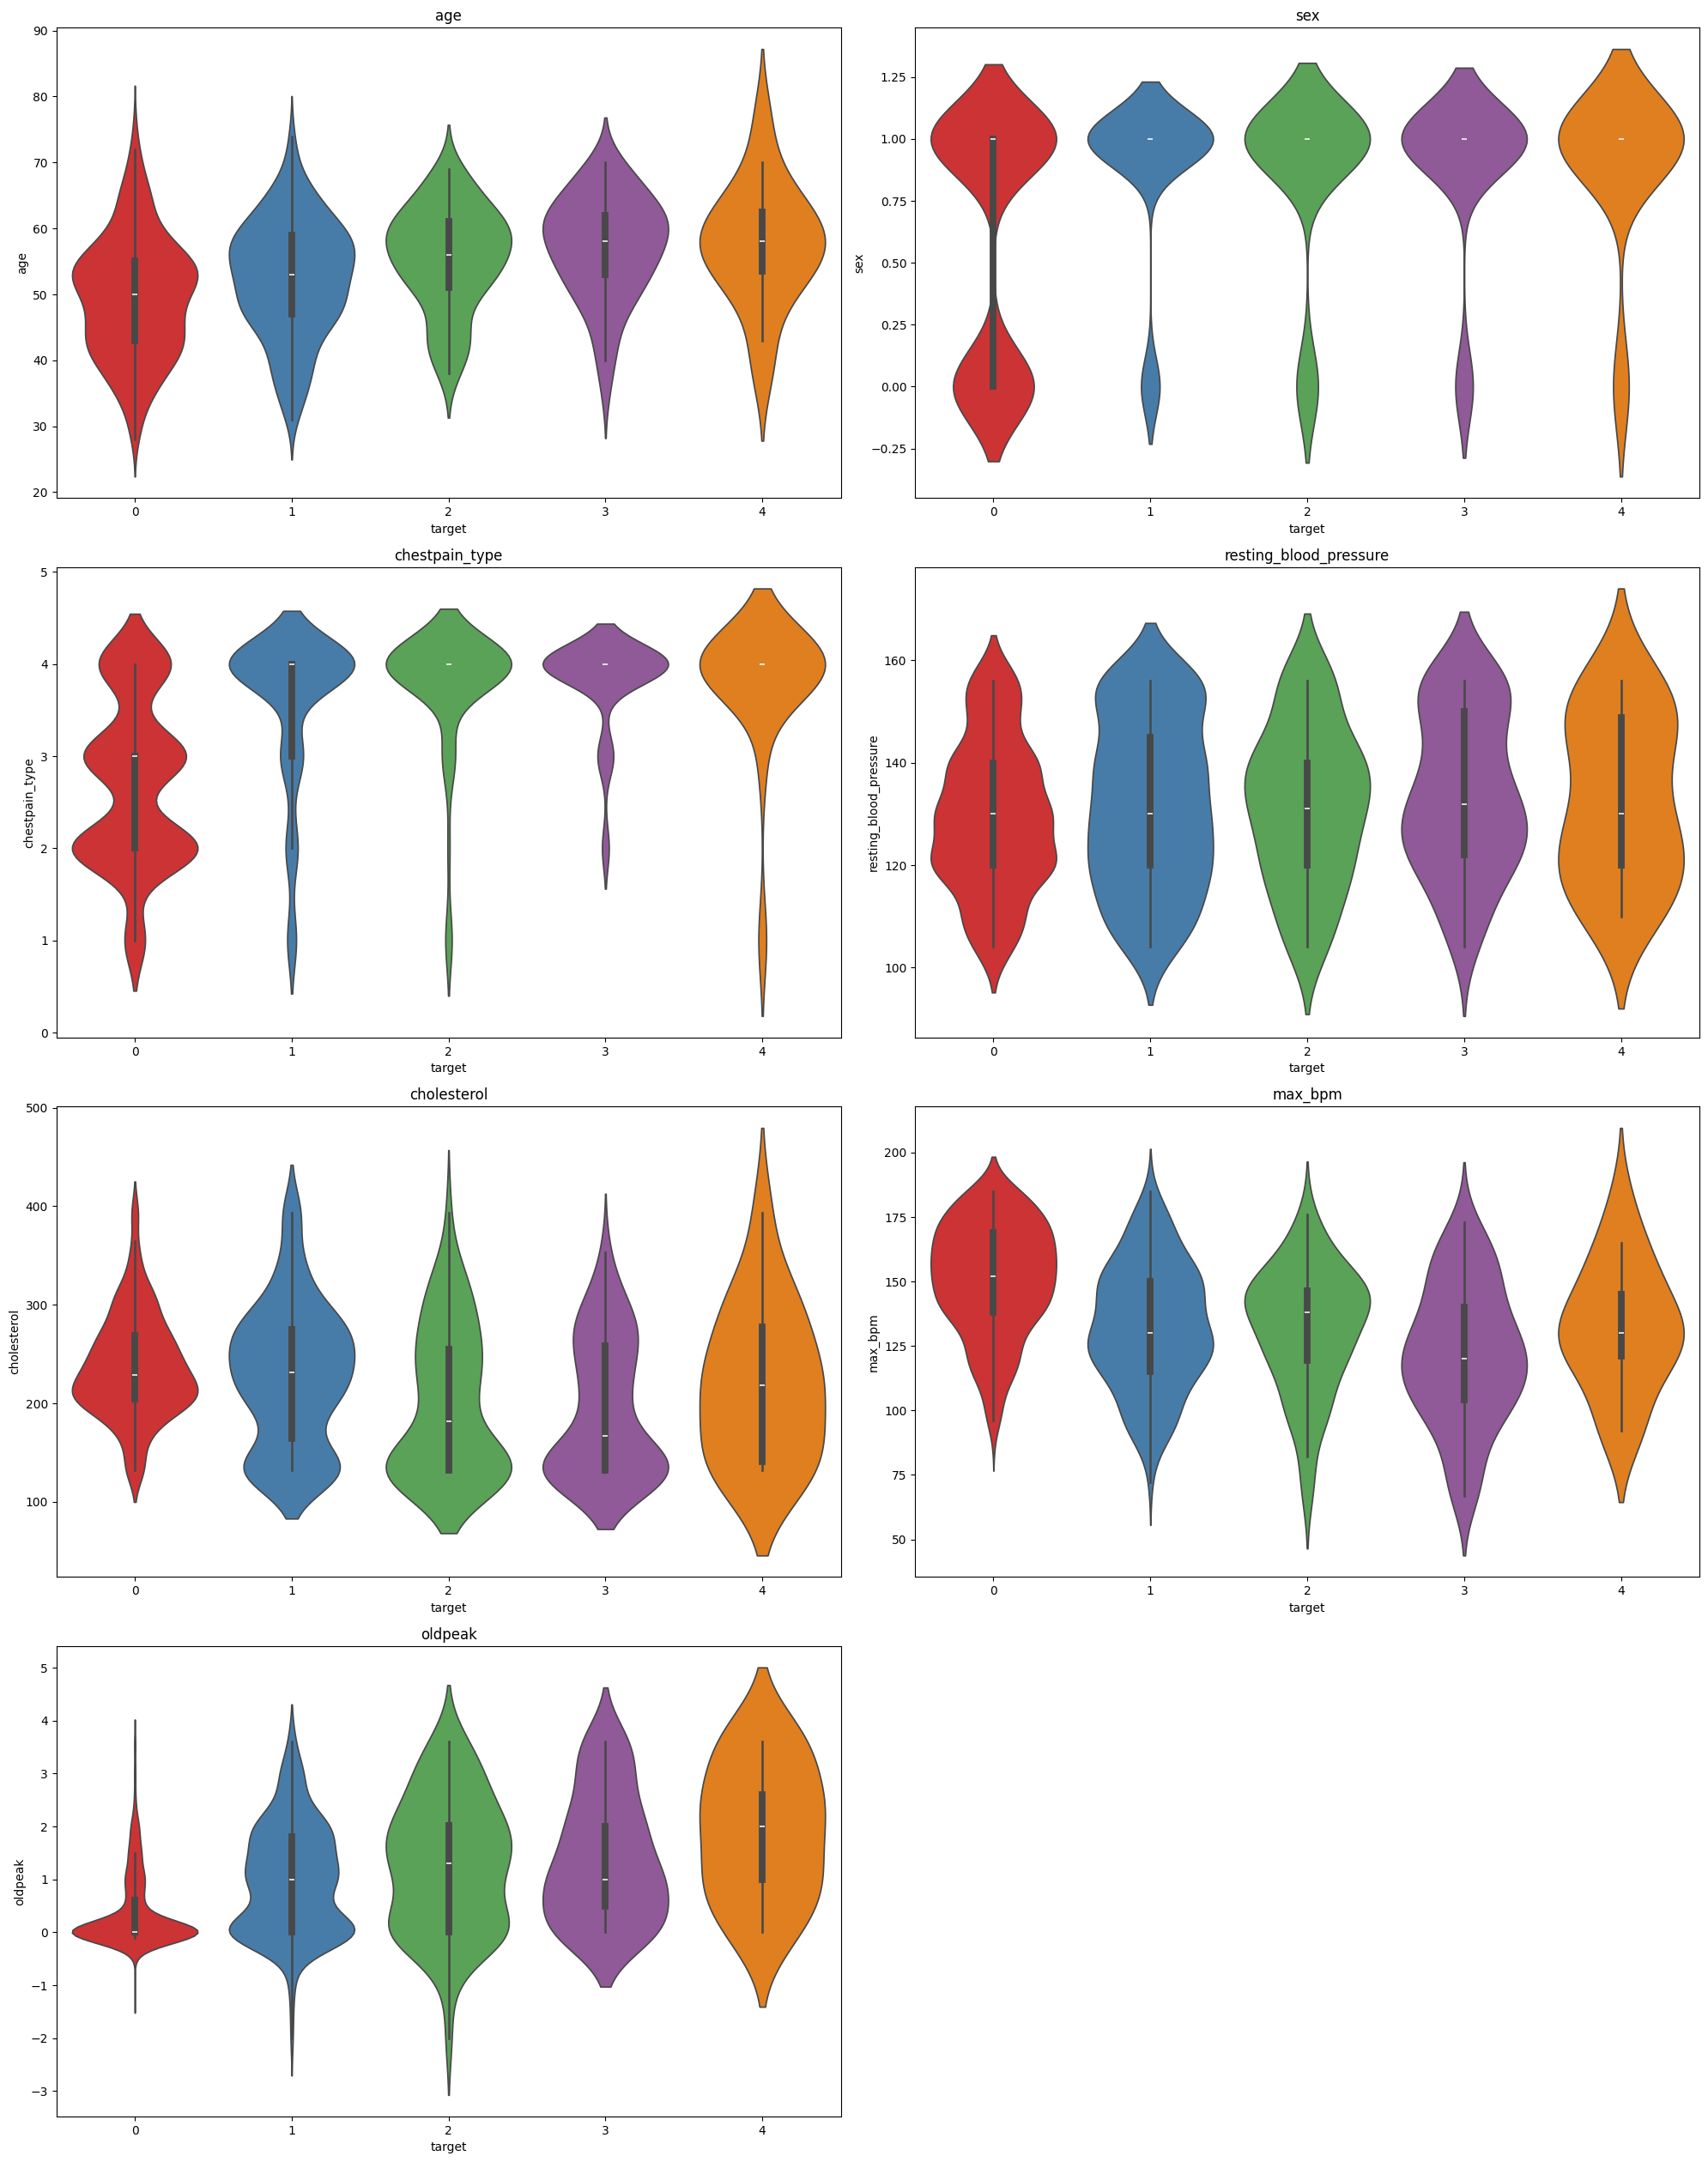

In [43]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.drop(columns='target').select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.violinplot(x=df_wins.columns[0], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

Vamos a ubicar los registros de acuerdo a su categoría, de manera que podamos dibujar nuestro diagrama de densidad

In [44]:
def categories(df):
    target_var = {}
    target_var['Target 0'] = df.loc[df.target == 0]
    target_var['Target 1'] = df.loc[df.target == 1]
    target_var['Target 2'] = df.loc[df.target == 2]
    target_var['Target 3'] = df.loc[df.target == 3]

    return target_var

Con el diagrama de densidad se puede observar aquellas variables independientes que mejor discriminan las clases de la variable objetivo.

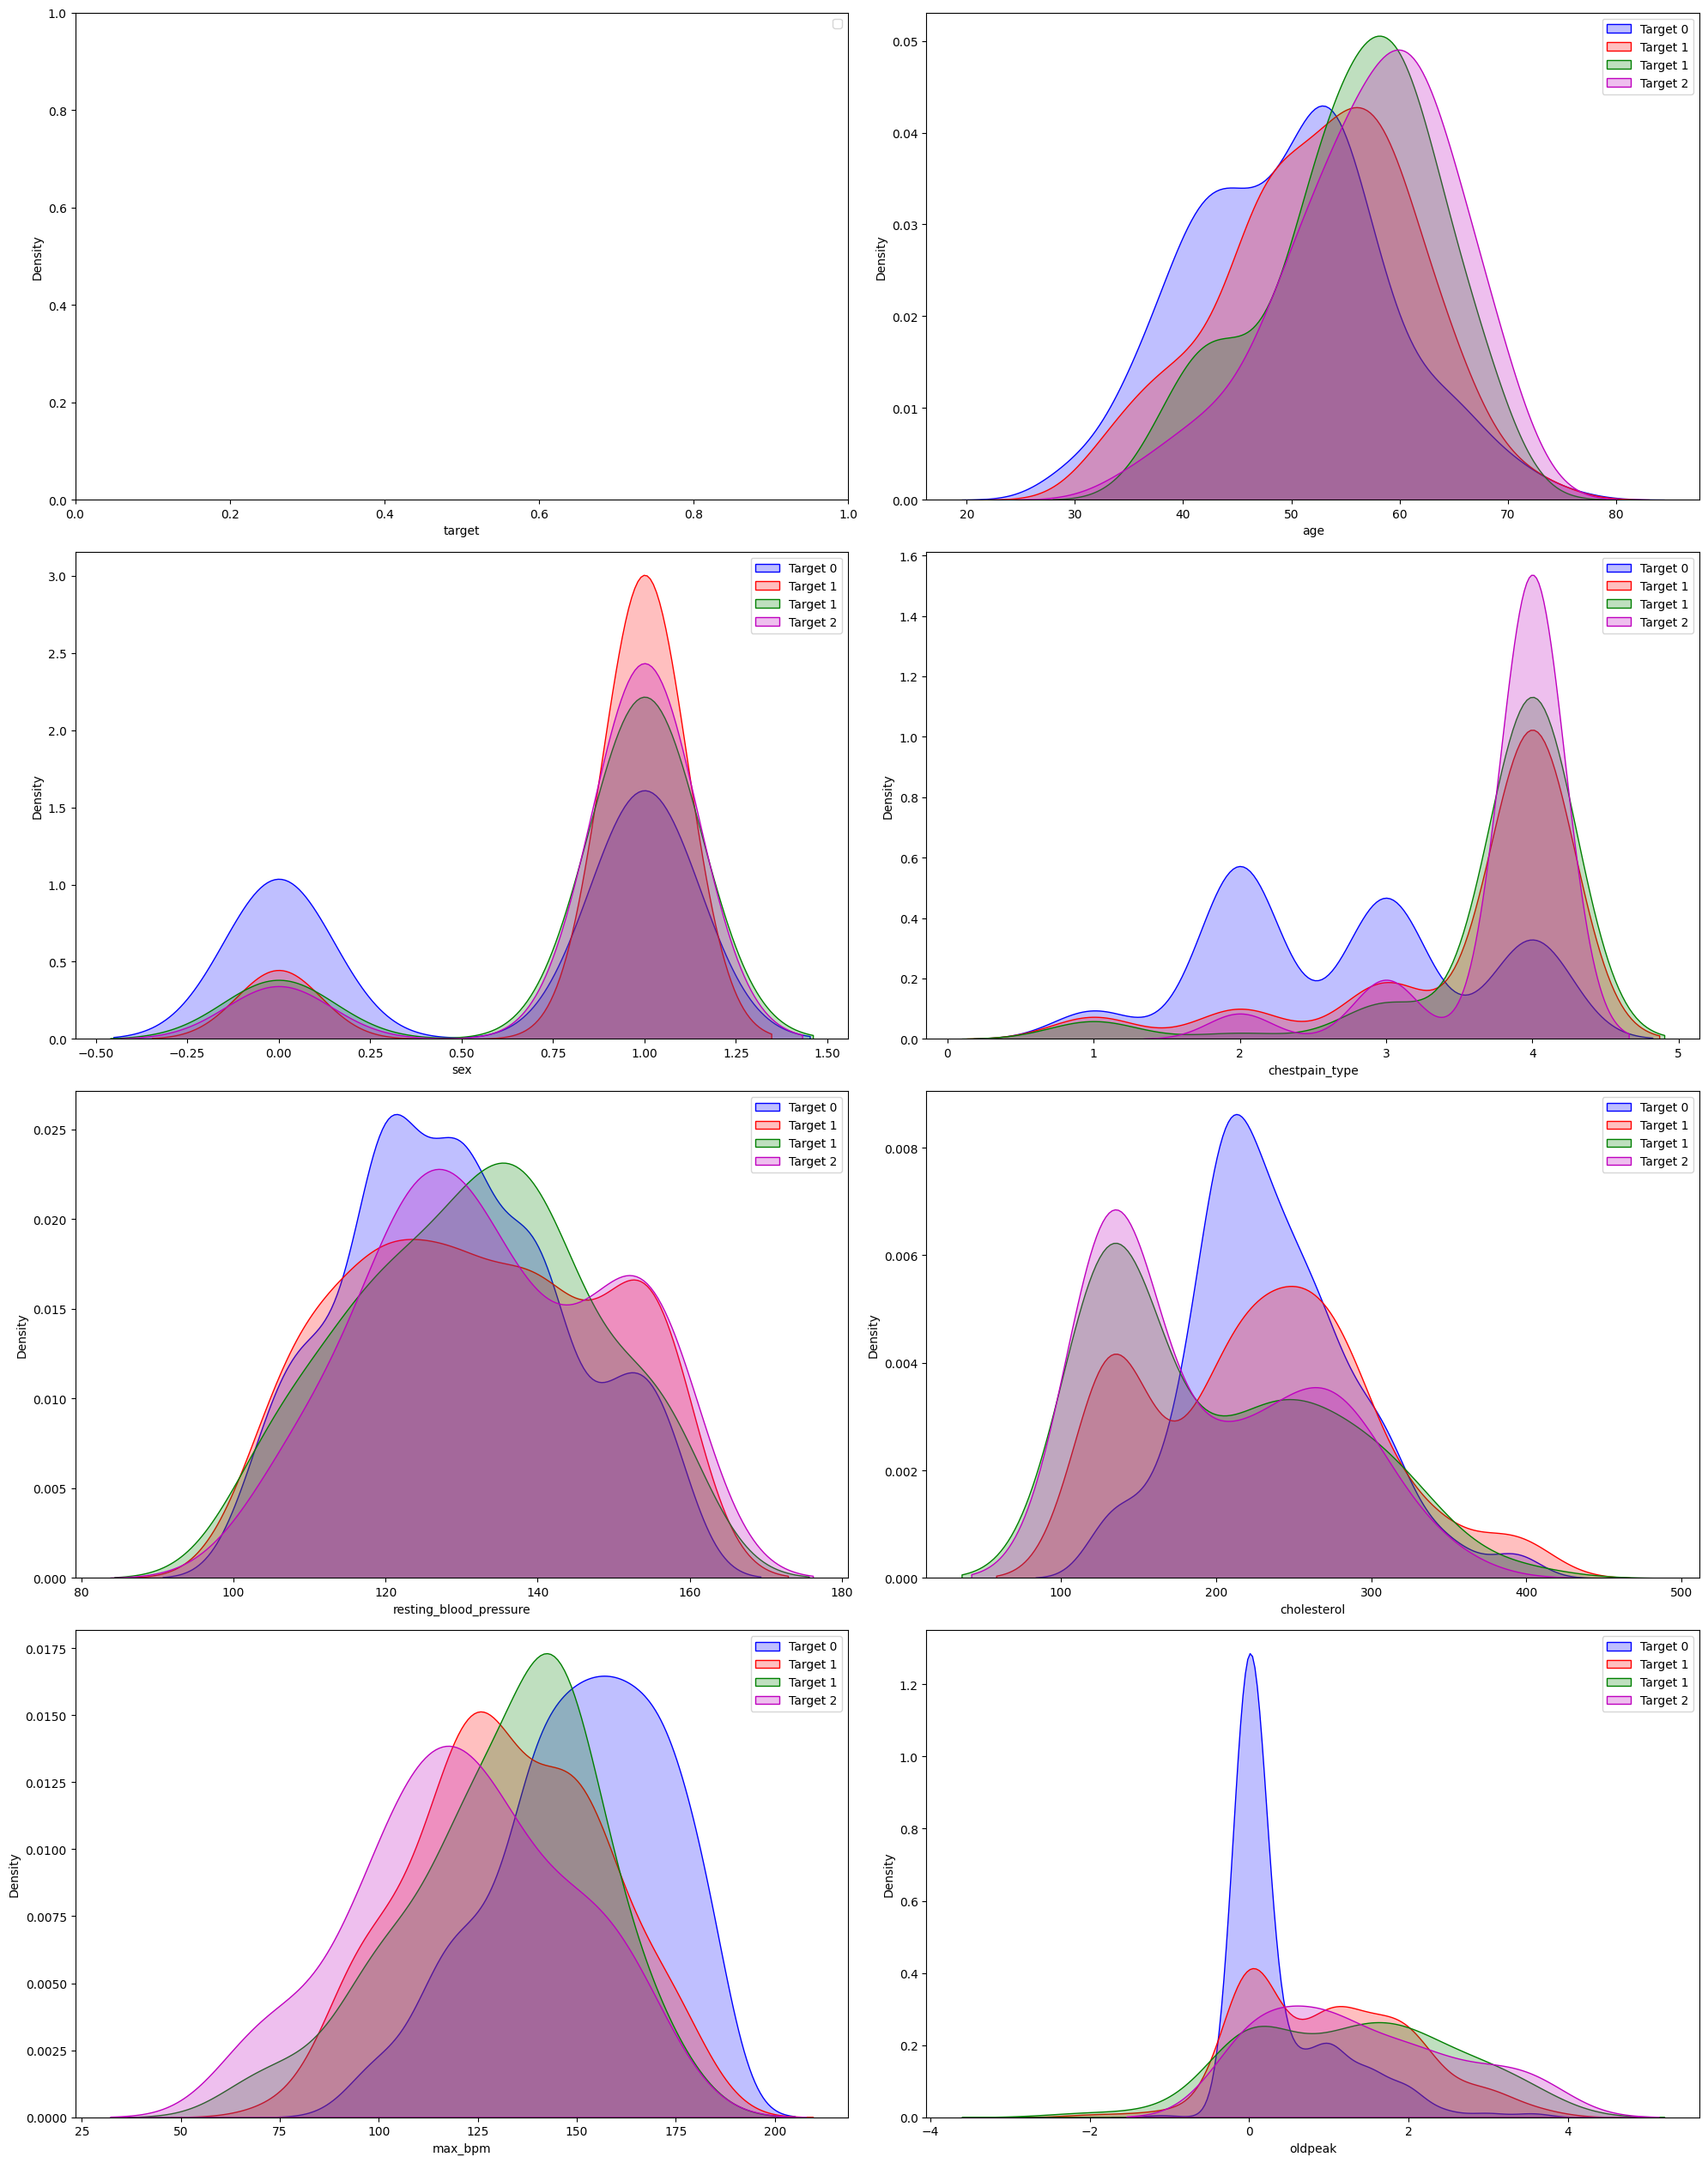

In [45]:
target_var = categories(df_wins)

i=1
fig = plt.figure(figsize=[20, 50])
for var_num in df_wins.select_dtypes('number').columns:
    ax = fig.add_subplot(8, 2, i)
    sns.kdeplot(target_var['Target 0'][[var_num]].iloc[:,0], shade=True, color="b", label="Target 0",palette='Set1')
    sns.kdeplot(target_var['Target 1'][[var_num]].iloc[:,0], shade=True, color="r", label="Target 1",palette='Set1')
    sns.kdeplot(target_var['Target 2'][[var_num]].iloc[:,0], shade=True, color="g", label="Target 1",palette='Set1')
    sns.kdeplot(target_var['Target 3'][[var_num]].iloc[:,0], shade=True, color="m", label="Target 2",palette='Set1')
    plt.legend()
    i+=1
fig.tight_layout()

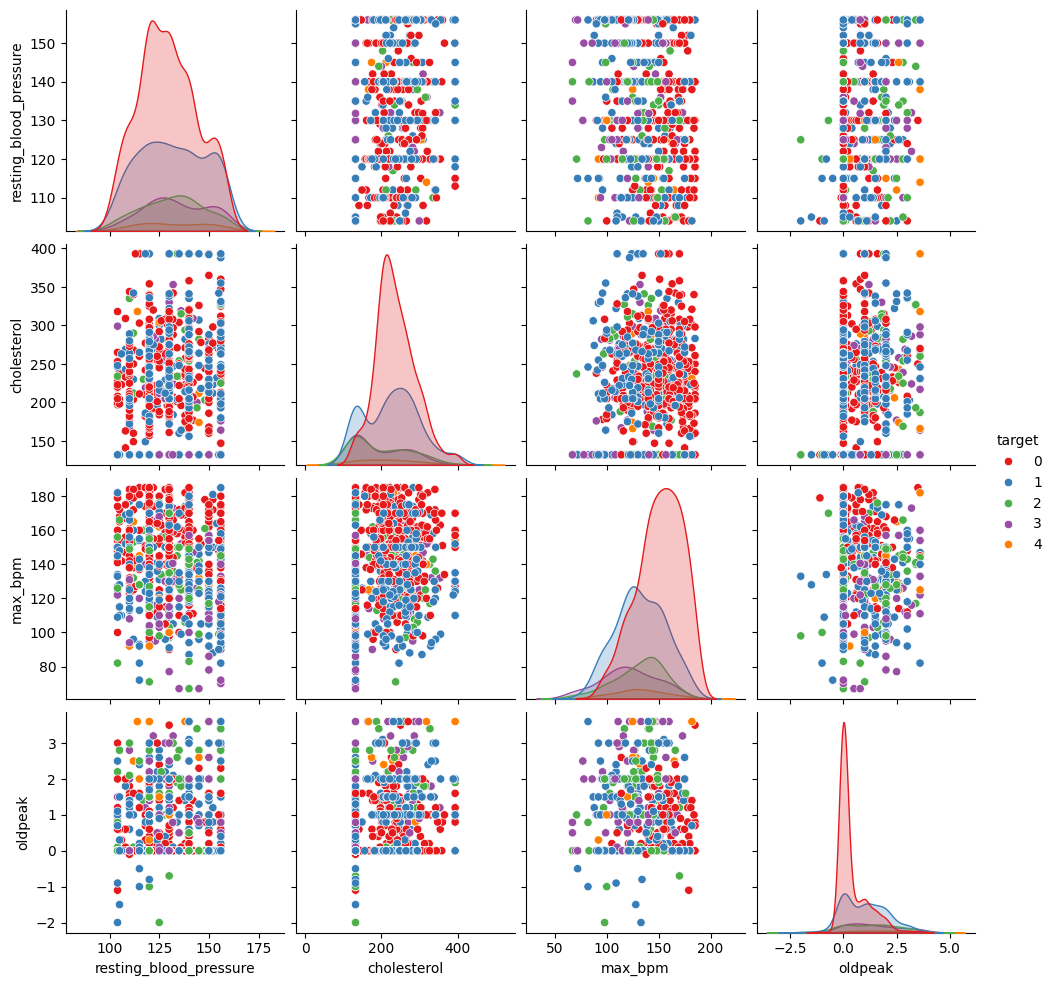

In [46]:

ax = sns.pairplot(df_wins, vars=['resting_blood_pressure','cholesterol', 'max_bpm',
                                 'oldpeak'], hue="target", palette='Set1')



In [47]:
df_wins.select_dtypes(include=['int64','float64']).corr()

target       age       sex  chestpain_type  \
target                  1.000000  0.285736  0.237417        0.436561   
age                     0.285736  1.000000 -0.026807        0.159796   
sex                     0.237417 -0.026807  1.000000        0.154897   
chestpain_type          0.436561  0.159796  0.154897        1.000000   
resting_blood_pressure  0.090764  0.257036  0.006982        0.005295   
cholesterol            -0.204593 -0.015148 -0.180415       -0.090990   
max_bpm                -0.368601 -0.331448 -0.146998       -0.339308   
oldpeak                 0.401321  0.225127  0.074746        0.246456   

                        resting_blood_pressure  cholesterol   max_bpm  \
target                                0.090764    -0.204593 -0.368601   
age                                   0.257036    -0.015148 -0.331448   
sex                                   0.006982    -0.180415 -0.146998   
chestpain_type                        0.005295    -0.090990 -0.339308   
resting_blood_pressure                1.000000     0.099037 -0.112389   
cholesterol                           0.099037     1.000000  0.180759   
max_bpm                              -0.112389     0.180759  1.000000   
oldpeak                               0.168883     0.100455 -0.159889   

                         oldpeak  
target                  0.401321  
age                     0.225127  
sex                     0.074746  
chestpain_type          0.246456  
resting_blood_pressure  0.168883  
cholesterol             0.100455  
max_bpm                -0.159889  
oldpeak                 1.000000

Al construir la matriz de correlaciones vemos que las variables númericas en general no presentan alto nivel de dependencia lineal entre ellas, aún con la variable objetivo.

- Extrañamente, la variable de presión arterial en reposo parece tener muy poca incidencia lineal sobre la variable objetivo.
- Por lo demás, los atributos presentan correlaciones bajas y medias entre ellas, sin una señal clara que nos alerte de multicolinealidad.

Procedemos a graficar estas correlaciones en heatmaps.

In [48]:
!pip install dython

In [49]:
from dython.nominal import identify_nominal_columns, identify_numeric_columns, correlation_ratio
categorical_features=identify_nominal_columns(df_wins)
continuous_features=identify_numeric_columns(df_wins)
categorical_features

['location', 'blood_sugar', 'ekg', 'angina', 'peak_slope']

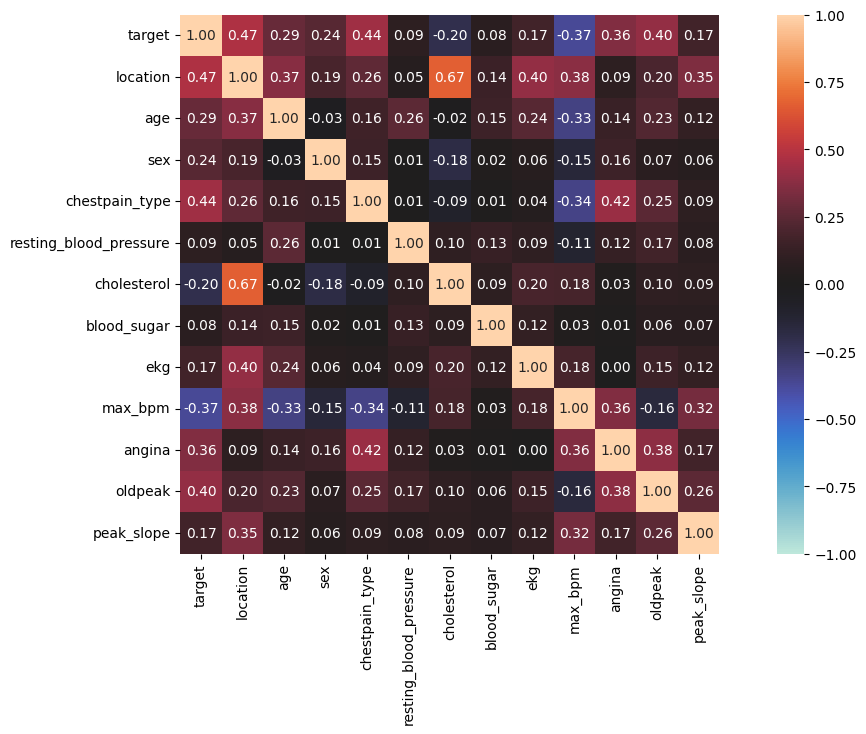

In [50]:

from dython.nominal import associations
complete_correlation= associations(df_wins, filename= 'complete_correlation.png', figsize=(15,7))


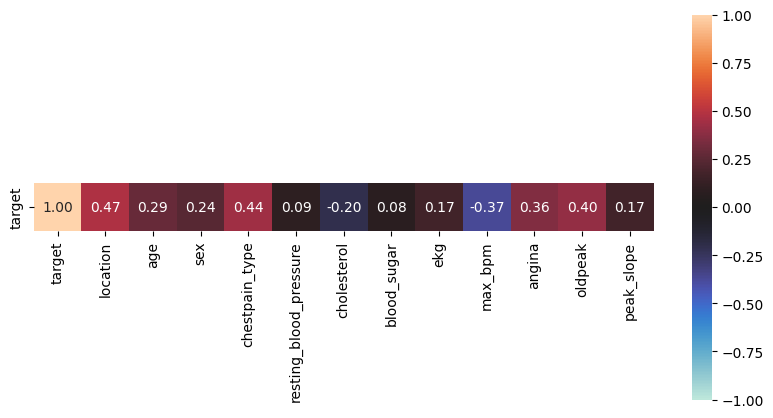

In [51]:
target_correlation= associations(df_wins, display_rows=['target'], filename= 'target_correlation.png', figsize=(10,5))

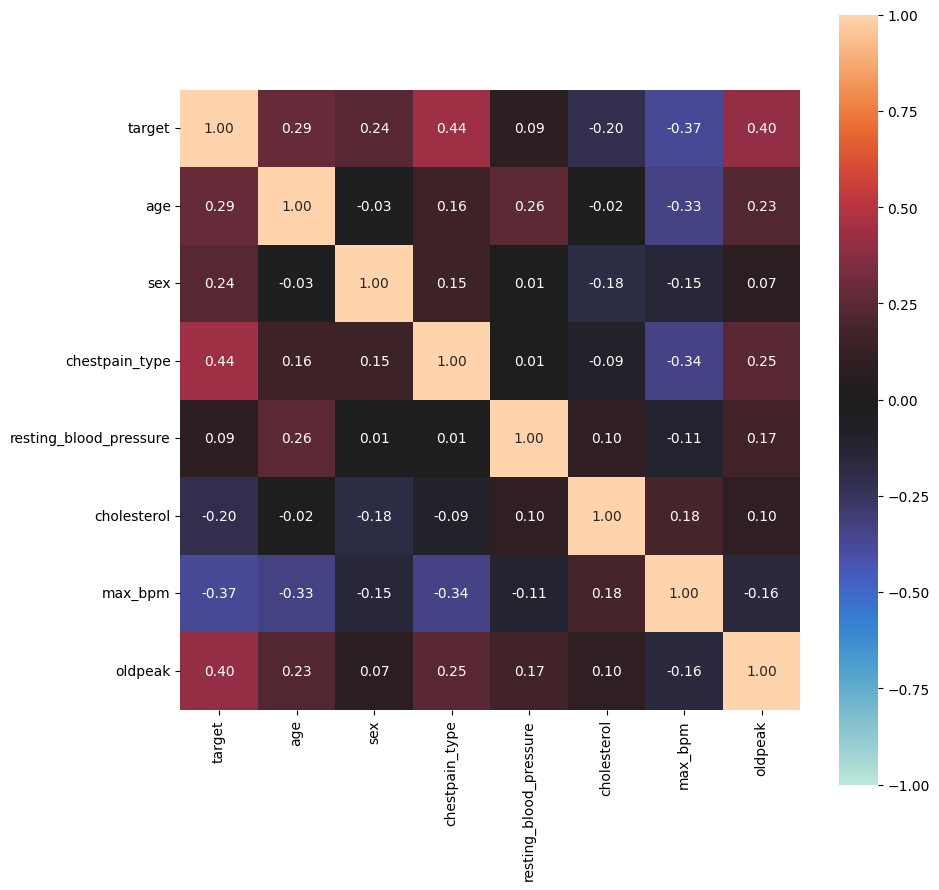

In [52]:
# Obtenemos la matriz de correlación entre las variables continuas

selected_column= df_wins[continuous_features]
continuous_df = selected_column.copy()

continuous_correlation= associations(continuous_df, filename= 'continuous_correlation.png', figsize=(10,10))

Dado que no existen variables independientes que muestren altas correlaciones entre sí, se descarta la eliminación de nuevas variables, sobre todo porque al ser datos clíncos se busca mantener la mayor cantidad de información posible.

### 4.3 Ingeniería de datos

Procedemos a convertir la variable objetivo en categorica para la corrida de modelos que iniciaremos a continuación.

In [53]:
df_wins['target'] = df_wins['target'].astype('category')

In [54]:
df_wins.set_index('location', drop=True, inplace=True)

In [55]:
# Construimos una función que nos permite obetener el X y el y para el dataframe de carros

def obtain_X_y(df):
    return df.drop(columns=['target']),df[['target']]

## 5. Protocolos de evaluación

Se particiona el dataset en los datos de entrenamiento y prueba, así como se identifica debidamente la variable objetivo y los atributos $ (y, X) $

In [56]:
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento
from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()



# Particionamos los datos para nuestra primer versión
X['rem'], y['rem'] = obtain_X_y(df_wins)



X_train['rem'], X_test['rem'], y_train['rem'], y_test['rem'] = train_test_split(X['rem'],y['rem'],random_state=1234,test_size=0.3)
print(X_train['rem'].shape)
print(X_test['rem'].shape)
print(y_train['rem'].shape)
print(y_test['rem'].shape)

(504, 11)
(216, 11)
(504, 1)
(216, 1)


In [57]:
y

{'rem':           target
 location        
 Cleveland      0
 Cleveland      2
 Cleveland      1
 Cleveland      0
 Cleveland      0
 ...          ...
 Suiza          1
 Suiza          3
 Suiza          0
 Suiza          1
 Suiza          1
 
 [720 rows x 1 columns]}

## 6. Métricas de evalución

Implementamos una función que nos permita calcular las métricas de regresión para el conjunto de entrenamiento y de prueba (Accuracy, Kappa, Precision, Recall)

Nos retornará el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de entrenamiento y el de prueba
- Accuracy = (TP + TN) / (TP + FP + FN + TN)
- Kappa = (OA - AC) / (1 - AC)
- Precision = TP / (TP + FP) (valor positivo predicho, la proporción correcta de identificaciones positivas)
- Recall = TP / (TP + FN) (la proporción de positivos que fueron identificados correctamente)

In [58]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score

def classification_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    prec_train = precision_score(y_train, y_pred_train,average=None,labels=["0","1","2","3","4"])
    prec_test = precision_score(y_test, y_pred_test,average=None,labels=["0","1","2","3","4"])
    recall_train = recall_score(y_train, y_pred_train,average=None,labels=["0","1","2","3","4"])
    recall_test = recall_score(y_test, y_pred_test,average=None,labels=["0","1","2","3","4"])
    metrics = {"Training Accuracy": acc_train,
               "Test Accuracy": acc_test,
               "Training Kappa": kappa_train,
               "Test Kappa": kappa_test,
               "Training Precision": prec_train,
               "Test Precision": prec_test,
               "Training recall": recall_train,
               "Test recall": recall_test
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics

def kappa_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    return kappa_train, kappa_test

### Modelo base con el dummy classifier

Establecemos la línea base a partir de un dummy classifier que utiliza como estrategia la moda (ya que estamos trabajando con una tarea de clasificación)

In [59]:
from sklearn.dummy import DummyClassifier

classification_metrics(DummyClassifier(strategy='most_frequent'),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

Training Accuracy = 0.5
Test Accuracy = 0.5
Training Kappa = 0.0
Test Kappa = 0.0
Training Precision = [0.5 0.  0.  0.  0. ]
Test Precision = [0.5 0.  0.  0.  0. ]
Training recall = [1. 0. 0. 0. 0.]
Test recall = [1. 0. 0. 0. 0.]


(DummyClassifier(strategy='most_frequent'),
 {'Training Accuracy': 0.5,
  'Test Accuracy': 0.5,
  'Training Kappa': 0.0,
  'Test Kappa': 0.0,
  'Training Precision': array([0.5, 0. , 0. , 0. , 0. ]),
  'Test Precision': array([0.5, 0. , 0. , 0. , 0. ]),
  'Training recall': array([1., 0., 0., 0., 0.]),
  'Test recall': array([1., 0., 0., 0., 0.])})

Training Accuracy = 0.5
Test Accuracy = 0.5

El modelo de clasificador dummy no parece aportar más información mayor que el azar.

### Reporte de métricas y matriz de confusión

Vamos a definir una función para dibujar la matriz de confusión y el reporte de clasificación en donde podemos obtener las métricas de entrenamiento y prueba

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

def report_and_conf_matrix(model,X_train,X_test,y_train,y_test):
    md = model.fit(X_train,y_train)
    y_pred_train = md.predict(X_train)
    y_pred_test = md.predict(X_test)
    cnf_matrix1 = confusion_matrix(y_train, y_pred_train)
    cnf_matrix2 = confusion_matrix(y_test, y_pred_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix1, classes=["0","1","2","3","4"],
                      title='Matriz de confusión Entrenamiento')
    print("Reporte Entrenamiento")
    print(classification_report(y_train, y_pred_train, target_names=["0","1","2","3","4"]))
    plt.show()
    plt.figure()
    plot_confusion_matrix(cnf_matrix2, classes=["0","1","2","3","4"],
                      title='Matriz de confusión Prueba')
    print("Reporte Prueba")
    print(classification_report(y_test, y_pred_test, target_names=["0","1","2","3","4"]))
    plt.show()


### Área bajo la curva ROC

Vamos a utilizar el área bajo la curva ROC para evaluar nuestro modelo también. Con esta gráfica vamos a poder visualizar el desempeño del modelo entre la sensibilidad (recall - true positive rate) y la especificidad (true negative rate 1 - FPR), de manera que podamos establecer un balance entre ambos.
- La curva ROC hace un plot entre el TPR y el FPR
- Recall es la habilidad para identificar correctamente las observaciones que son positivas
- Especificidad es la habilidad para indentificar correctamente las observaciones que son negativas
- AUC ROC nos permite identificar que tan bien nuestro modelo puede distinguir entre las clases.

Al tener nosotros un problema multi - clase utilizaremos una metodología uno vs el resto. Se tendrán tantas curvas como clases. Yellowbrick es muy útil y simple para esto

- Utilizando las curvas individuales podemos ver que tan bien nuestro modelo trabaja para cada una de las categorías

- La curva micro-average ROC agrega todas las instancias sobre todas las clases y nos brinda una sola curva para todas las predicciones (afectada por la moda).

- La curva macro-average ROC trata clase de manera independiente y nos presenta una curva ROC que es el promedio de los valores para cada clase (cada clase tiene la misma importancia).

In [61]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, X_train, y_train, X_test, y_test):
    visualizer = ROCAUC(model, encoder={0: 'neutral',
                                        1: 'riesgo menor',
                                        2: 'riesgo leve',
                                        3: 'riesgo moderado',
                                        4: 'riesgo mayor'})
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    return visualizer

Podemos observar el funcionamiento de la curva ROC y el área bajo ella utilizando uno de los modelos más sencillos para abordar tareas de clasificación, la regresión logística.

In [62]:
df_wins['target'].unique()

[0, 2, 1, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]

In [63]:
y_test

{'rem':           target
 location        
 Cleveland      4
 Cleveland      0
 Suiza          4
 Suiza          2
 Hungria        0
 ...          ...
 Hungria        0
 Suiza          3
 Hungria        0
 Cleveland      4
 Cleveland      0
 
 [216 rows x 1 columns]}

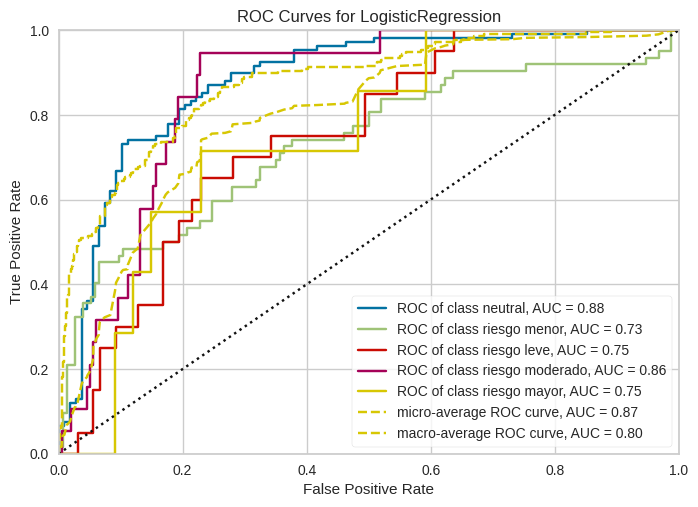

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo menor', 2: 'riesgo leve',
                3: 'riesgo moderado', 4: 'riesgo mayor'},
       estimator=LogisticRegression(random_state=1234))

In [64]:
plot_ROC_curve(LogisticRegression(random_state=1234), X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])



## 7. Implementación de los modelos

### 7.1. Modelo de regresión logística

In [65]:
from sklearn.linear_model import LogisticRegression

classification_metrics(LogisticRegression(random_state=1234),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

Training Accuracy = 0.628968253968254
Test Accuracy = 0.6018518518518519
Training Kappa = 0.3751334292476911
Test Kappa = 0.3534959802317893
Training Precision = [0.74410774 0.46524064 0.5        0.5        0.        ]
Test Precision = [0.80952381 0.42307692 0.         0.2        0.        ]
Training recall = [0.87698413 0.59183673 0.02083333 0.17391304 0.        ]
Test recall = [0.78703704 0.70967742 0.         0.05263158 0.        ]


(LogisticRegression(random_state=1234),
 {'Training Accuracy': 0.628968253968254,
  'Test Accuracy': 0.6018518518518519,
  'Training Kappa': 0.3751334292476911,
  'Test Kappa': 0.3534959802317893,
  'Training Precision': array([0.74410774, 0.46524064, 0.5       , 0.5       , 0.        ]),
  'Test Precision': array([0.80952381, 0.42307692, 0.        , 0.2       , 0.        ]),
  'Training recall': array([0.87698413, 0.59183673, 0.02083333, 0.17391304, 0.        ]),
  'Test recall': array([0.78703704, 0.70967742, 0.        , 0.05263158, 0.        ])})

In [66]:
# Guardamos el mejor modelo con regresión logística

import pickle
from sklearn.linear_model import LogisticRegressionCV

model,metrics = classification_metrics(LogisticRegressionCV(cv=5,random_state=1234),
                                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/logisticRegressionRem.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionRemMetrics.pkl', 'wb'))

Training Accuracy = 0.6468253968253969
Test Accuracy = 0.6203703703703703
Training Kappa = 0.41146216017634096
Test Kappa = 0.3895571256246768
Training Precision = [0.74917492 0.52531646 0.25       0.41935484 0.        ]
Test Precision = [0.80909091 0.44827586 0.33333333 0.30769231 0.        ]
Training recall = [0.90079365 0.56462585 0.0625     0.2826087  0.        ]
Test recall = [0.82407407 0.62903226 0.1        0.21052632 0.        ]


Dado el tipo de datos que estamos manejando, al evaluar el riesgo de los errores nos damos cuenta que con el fin de diagnosticar con mayor precisión los peores casos que ponen en riesgo al paciente, se busca aumentar los True Positive, es decir, reducir el número de pacientes diagnosticados como positivo y son negativos (precisión) y, principalmente, reducir el número de falsos negativos en pacientes con riesgo mayor que el predicho (recall).  

In [67]:
# Los hiperparámetros del mejor modelo de regresión logística

model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Reporte Entrenamiento
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       252
           1       0.53      0.56      0.54       147
           2       0.25      0.06      0.10        48
           3       0.42      0.28      0.34        46
           4       0.00      0.00      0.00        11

    accuracy                           0.65       504
   macro avg       0.39      0.36      0.36       504
weighted avg       0.59      0.65      0.61       504



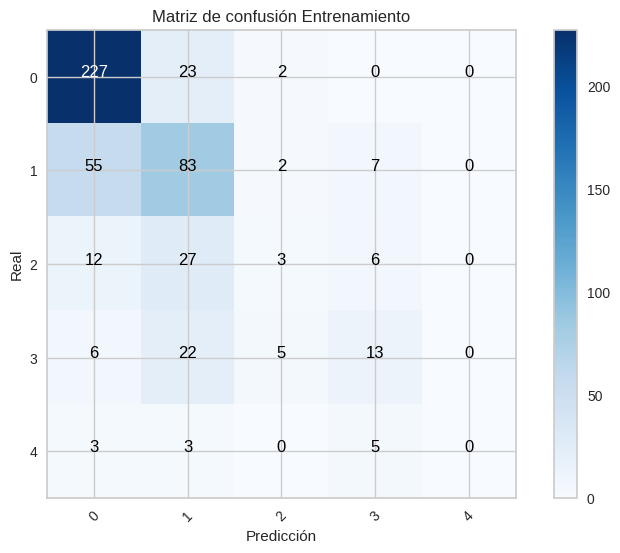

Reporte Prueba
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       108
           1       0.45      0.63      0.52        62
           2       0.33      0.10      0.15        20
           3       0.31      0.21      0.25        19
           4       0.00      0.00      0.00         7

    accuracy                           0.62       216
   macro avg       0.38      0.35      0.35       216
weighted avg       0.59      0.62      0.59       216



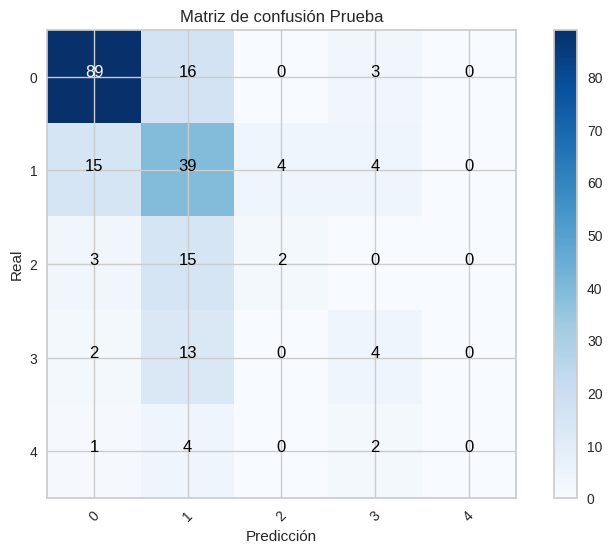

In [68]:
report_and_conf_matrix(LogisticRegressionCV(cv=5,random_state=1234),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

Vemos que el modelo se comporta mejor clasificando los casos que más ejemplos tiene. Conforme se avanza en el nivel de riesgo, el modelo clasifica erroneamente cada vez más. Para el nivel 0 clasifica correctamente en promedio el 81% de las veces vs 0% para el nivel 4.

En cuanto al recall el patrón se mantiene, aumentando el riesgo de omisión de diagnóstico conforme aumenta el riesgo, lo que nos deja en una posición incómoda pues los pacientes con mayor riesgo son los que menos se identifican con precisión.

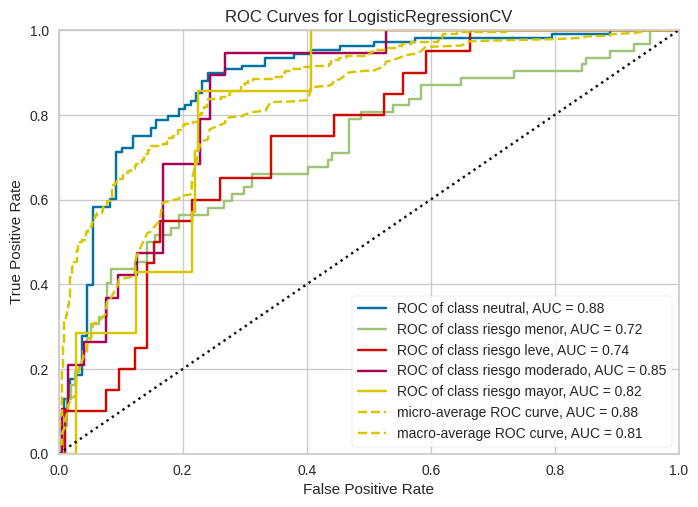

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo menor', 2: 'riesgo leve',
                3: 'riesgo moderado', 4: 'riesgo mayor'},
       estimator=LogisticRegressionCV(cv=5, random_state=1234))

In [69]:
plot_ROC_curve(LogisticRegressionCV(cv=5,random_state=1234),
               X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])

Aún así, la curva ROC de la clase de mayor riesgo presenta un AUC de 0.82, funcionando mejor que el azar al clasificarlos. Sin embargo, al revisar el Kappa de los modelos vemos que explican poco por fuera del azar la variabilidad de los datos.

Aunque previamente, en otra etapa habíamos eliminado variables, en esta etapa verificaremos la importancia de las variables independientes con respecto a la objetivo utilizando distintos métodos.

Esto con el fin de hallar el mejor grupo de variables que sirvan como insumo para nuestros modelos.

#### Selección de características

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def select_features(X_train, y_train, X_test,n):
  fs = SelectKBest(score_func=f_classif, k=n)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

Revisamos la importancia de las variables del conjunto de datos.

Feature 0: 10.323352
Feature 1: 12.121497
Feature 2: 43.777178
Feature 3: 1.179994
Feature 4: 6.846962
Feature 5: 0.908788
Feature 6: 4.496207
Feature 7: 27.143529
Feature 8: 37.742669
Feature 9: 27.273927
Feature 10: 5.765404


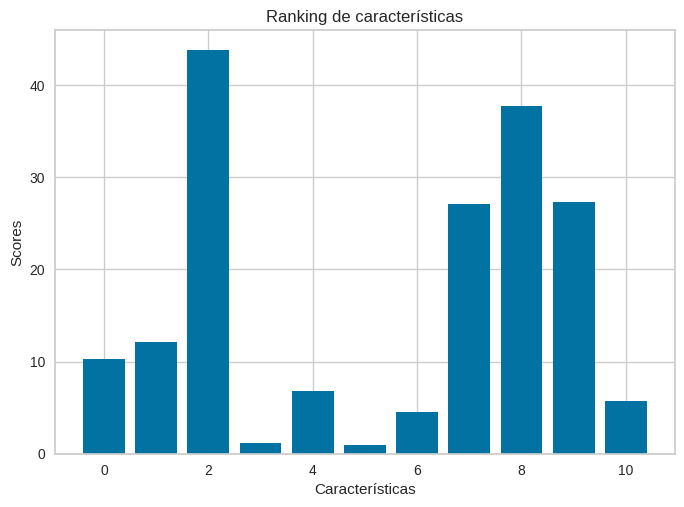

In [71]:
# Haciendo uso de los conjuntos ya transformados podemos ver el score de cada variable
# En este caso utilizamos todas las variables

n = X_train['rem'].shape[1]

X_train['rem_fs'], X_test['rem_fs'], fs = select_features(X_train['rem'], y_train['rem'], X_test['rem'],n)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
ax.set(title='Ranking de características',xlabel='Características',ylabel='Scores')
plt.show()

Index(['chestpain_type', 'oldpeak', 'age', 'cholesterol', 'max_bpm'], dtype='object')


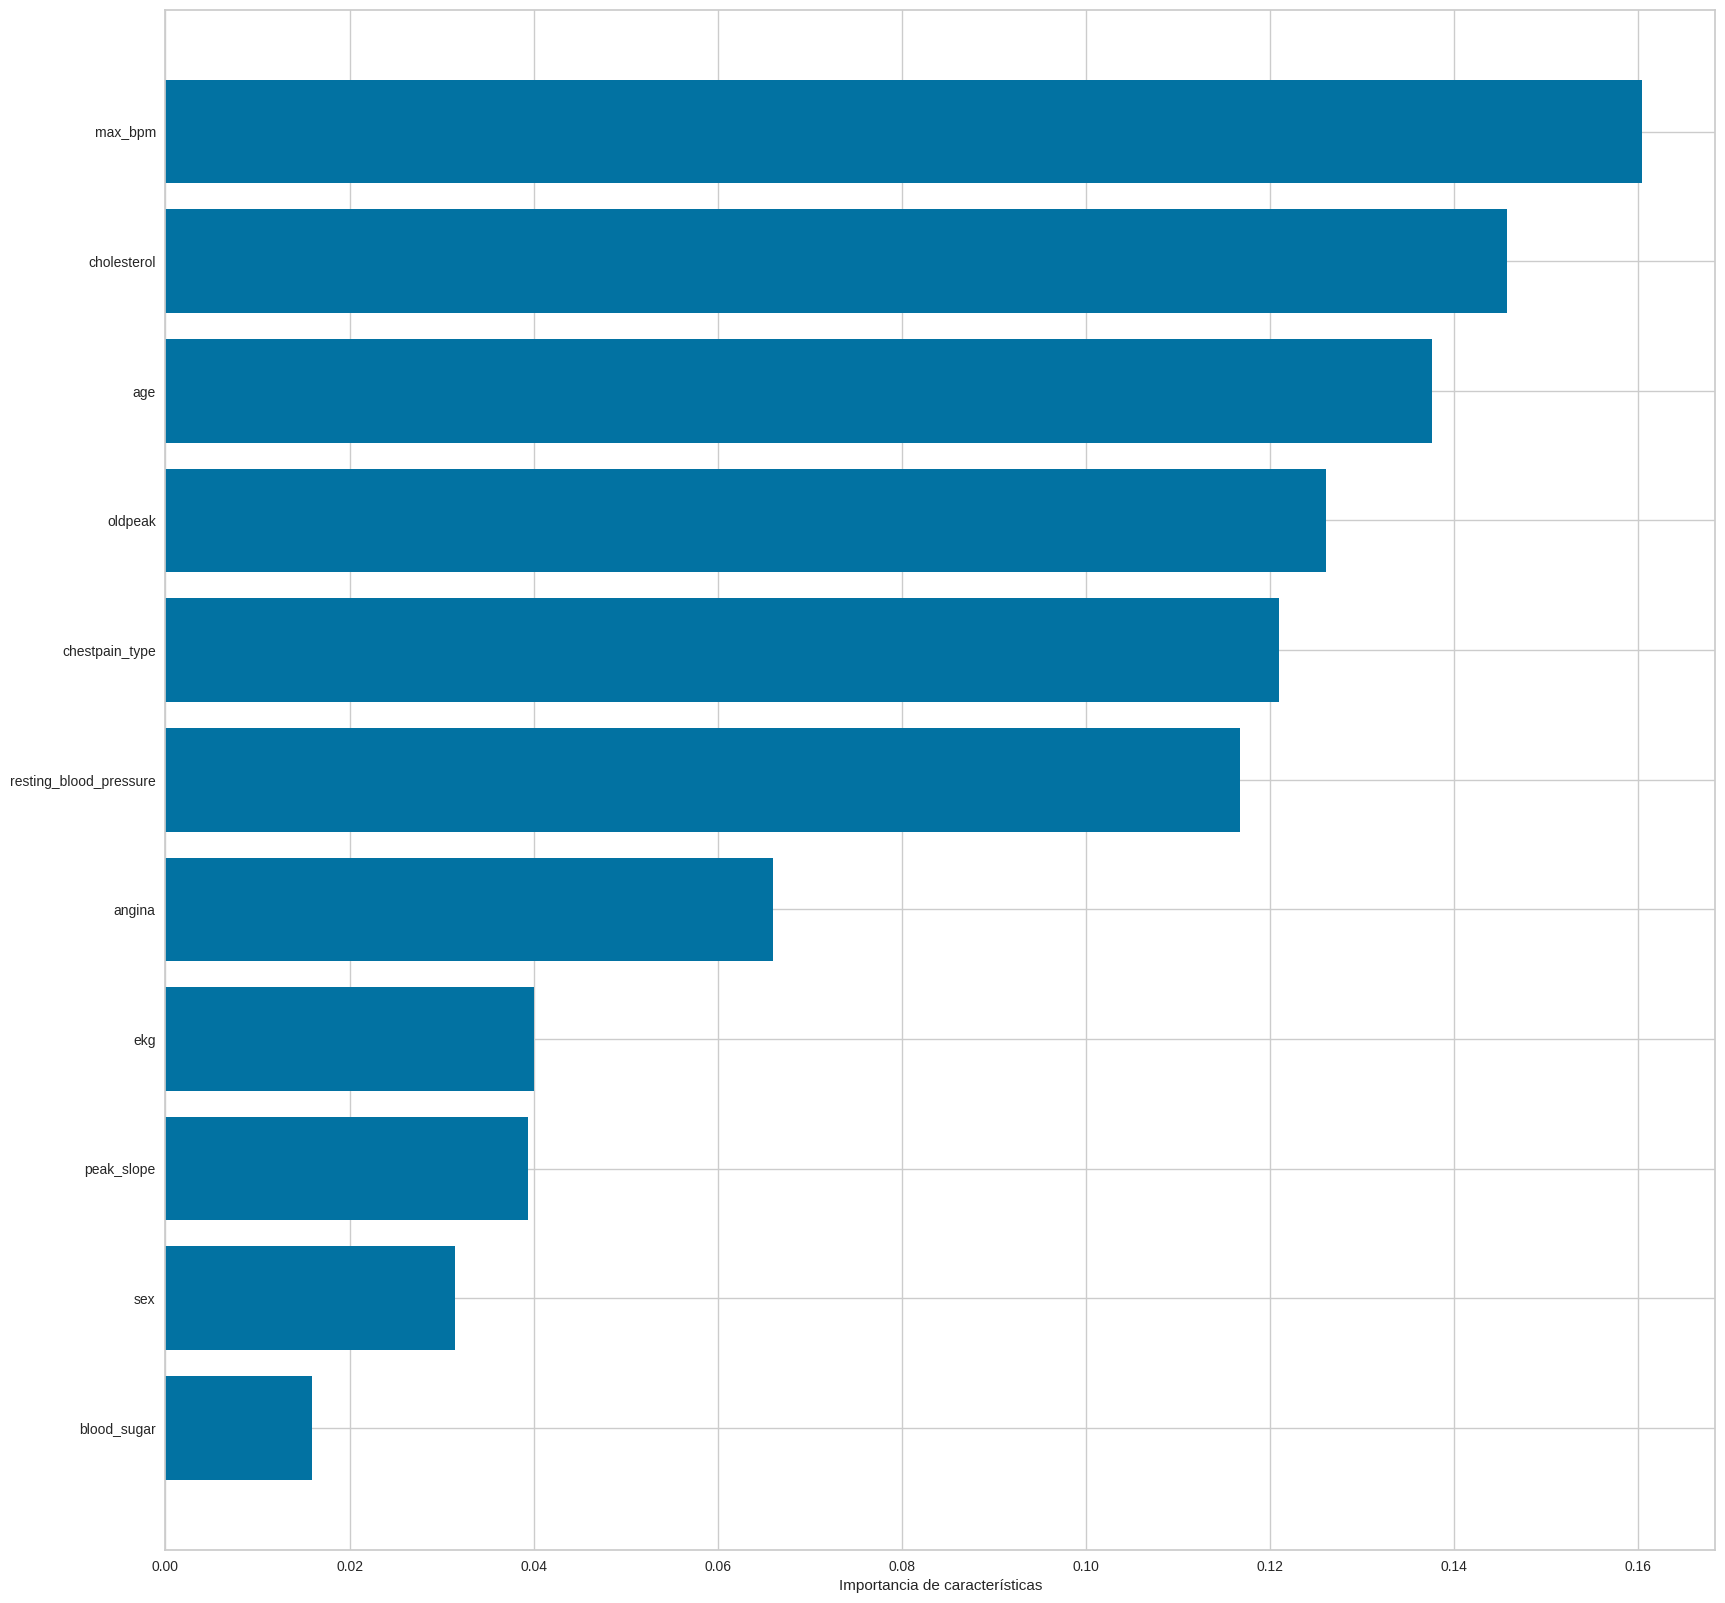

In [74]:
# Haciendo uso de un modelo de Random Forest Classifier hacemos un ranking de características
# Ordenamos y graficamos

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(n_estimators=150,random_state=1234)
rf.fit(X_train['rem'], y_train['rem'])
sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20,20))
plt.barh(df_wins.columns[1:][sort], rf.feature_importances_[sort])
plt.xlabel("Importancia de características")
l = len(df_wins.columns[1:])
importants = df_wins.columns[1:][sort][-5:]
print(importants)

Revisamos la cantidad de variables a seleccionar para el conjunto de datos

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

(0.4070006863417983, 10)


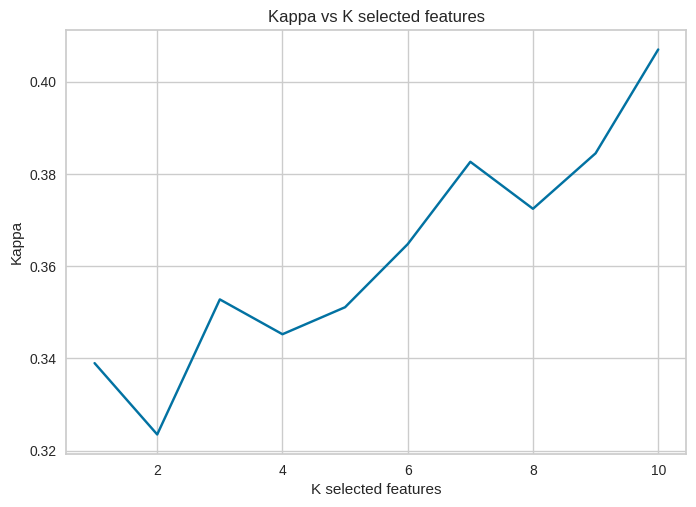

In [77]:
from sklearn.pipeline import make_pipeline

n = X_train['rem'].shape[1]
results = [kappa_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=i),
                                                 StandardScaler(),
                                                 RandomForestClassifier(n_estimators=150,random_state=1234)),
            X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])[1] for i in range(1,n)]
ax = sns.lineplot(x=range(1,n),
             y=results)
ax.set(title="Kappa vs K selected features",ylabel='Kappa',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,n))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Al revisar cómo evoluciona el kappa de acuerdo con el numero de atributos usados, vemos que la mejor manera de lograr el kappa más alto es manteniendo la cantidad de atributos usados.

In [80]:
# Modelo de regresión logística utilizando datos sin PCA y feature selection de 31 variables

model,metrics = classification_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=10),
                                                 LogisticRegressionCV(cv=5,random_state=1234)),
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/logisticRegressionRemFS.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionRemFSMetrics.pkl', 'wb'))

Training Accuracy = 0.6448412698412699
Test Accuracy = 0.6018518518518519
Training Kappa = 0.39960468784315295
Test Kappa = 0.3479588613148934
Training Precision = [0.73 0.54 0.18 0.42 0.  ]
Test Precision = [0.77 0.44 0.25 0.14 0.  ]
Training recall = [0.92 0.56 0.04 0.22 0.  ]
Test recall = [0.81 0.65 0.05 0.05 0.  ]


### 7.2 Modelo K - vecinos

Para este modelo tan solamente incluimos las variables continuas, pues es un método basado en distancias. No tienen sentido utilizar las variables categóricas dummificadas

In [81]:
df_wins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, Cleveland to Suiza
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   target                  720 non-null    category
 1   age                     720 non-null    float64 
 2   sex                     720 non-null    int64   
 3   chestpain_type          720 non-null    int64   
 4   resting_blood_pressure  720 non-null    float64 
 5   cholesterol             720 non-null    float64 
 6   blood_sugar             720 non-null    category
 7   ekg                     720 non-null    category
 8   max_bpm                 720 non-null    float64 
 9   angina                  720 non-null    category
 10  oldpeak                 720 non-null    float64 
 11  peak_slope              720 non-null    category
dtypes: category(5), float64(5), int64(2)
memory usage: 65.4+ KB


In [85]:
# Escalamos y estandarizamos para ver los resultados del modelo

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

print('Stadardization')
knnReg_st = make_pipeline(StandardScaler(),KNeighborsClassifier())
cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_bpm', 'oldpeak']
classification_metrics(knnReg_st,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])
print()
print('Normalization')
knnReg_norm = make_pipeline(MinMaxScaler(),KNeighborsClassifier())
classification_metrics(knnReg_norm,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])

Stadardization
Training Accuracy = 0.6964285714285714
Test Accuracy = 0.5370370370370371
Training Kappa = 0.4963324863978681
Test Kappa = 0.22713610991841993
Training Precision = [0.74 0.65 0.44 0.68 0.33]
Test Precision = [0.66 0.43 0.07 0.   0.  ]
Training recall = [0.9  0.64 0.23 0.37 0.09]
Test recall = [0.84 0.39 0.05 0.   0.  ]

Normalization
Training Accuracy = 0.6666666666666666
Test Accuracy = 0.5555555555555556
Training Kappa = 0.437339269694654
Test Kappa = 0.25361745014757764
Training Precision = [0.71 0.6  0.48 0.61 0.5 ]
Test Precision = [0.67 0.42 0.   0.33 0.  ]
Training recall = [0.91 0.57 0.23 0.24 0.09]
Test recall = [0.85 0.4  0.   0.16 0.  ]


(Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())]),
 {'Training Accuracy': 0.6666666666666666,
  'Test Accuracy': 0.5555555555555556,
  'Training Kappa': 0.437339269694654,
  'Test Kappa': 0.25361745014757764,
  'Training Precision': array([0.71, 0.6 , 0.48, 0.61, 0.5 ]),
  'Test Precision': array([0.67, 0.42, 0.  , 0.33, 0.  ]),
  'Training recall': array([0.91, 0.57, 0.23, 0.24, 0.09]),
  'Test recall': array([0.85, 0.4 , 0.  , 0.16, 0.  ])})

Exploramos el mejor k para el modelo

In [87]:
cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_bpm', 'oldpeak']
for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
    classification_metrics(knnReg_st,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])
    print()

Results for k = 1
Training Accuracy = 1.0
Test Accuracy = 0.4861111111111111
Training Kappa = 1.0
Test Kappa = 0.2012792324605237
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.68 0.33 0.14 0.32 0.  ]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.7  0.32 0.15 0.32 0.  ]

Results for k = 3
Training Accuracy = 0.6865079365079365
Test Accuracy = 0.5185185185185185
Training Kappa = 0.4728940783986656
Test Kappa = 0.18873239436619704
Training Precision = [0.72 0.63 0.58 0.74 1.  ]
Test Precision = [0.62 0.38 0.11 0.33 0.  ]
Training recall = [0.9  0.61 0.29 0.3  0.09]
Test recall = [0.8  0.35 0.05 0.16 0.  ]

Results for k = 5
Training Accuracy = 0.6666666666666666
Test Accuracy = 0.5555555555555556
Training Kappa = 0.437339269694654
Test Kappa = 0.25361745014757764
Training Precision = [0.71 0.6  0.48 0.61 0.5 ]
Test Precision = [0.67 0.42 0.   0.33 0.  ]
Training recall = [0.91 0.57 0.23 0.24 0.09]
Test recall = [0.85 0.4  0.   0.16 0.  ]

Results for k = 7
Training Accur

(0.34079348931841313, 15)


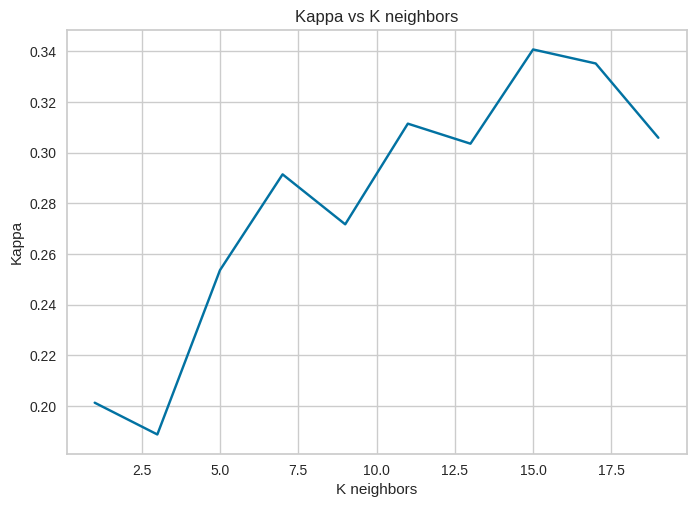

In [88]:
# Visualizamos el kappa
# Observamos la mejor respuesta con k=1

cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_bpm', 'oldpeak']
knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
results = [kappa_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=i)),
            X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="Kappa vs K neighbors",ylabel='Kappa',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Identificamos que el mejor modelo lo obtenemos con K = 15, por lo que procedemos a guardar el modelo.

In [91]:
# Guardamos el mejor modelo utilizando k=15

cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_bpm', 'oldpeak']
model,metrics = classification_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=15)),
                                   X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/KnnClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnClassifierRemMetrics.pkl','wb'))

Training Accuracy = 0.628968253968254
Test Accuracy = 0.6111111111111112
Training Kappa = 0.3452089817696754
Test Kappa = 0.34079348931841313
Training Precision = [0.67 0.55 0.14 0.6  0.  ]
Test Precision = [0.71 0.47 0.33 0.25 0.  ]
Training recall = [0.95 0.48 0.02 0.13 0.  ]
Test recall = [0.88 0.55 0.1  0.05 0.  ]


Reporte Entrenamiento
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       252
           1       0.55      0.48      0.51       147
           2       0.14      0.02      0.04        48
           3       0.60      0.13      0.21        46
           4       0.00      0.00      0.00        11

    accuracy                           0.63       504
   macro avg       0.39      0.32      0.31       504
weighted avg       0.56      0.63      0.56       504



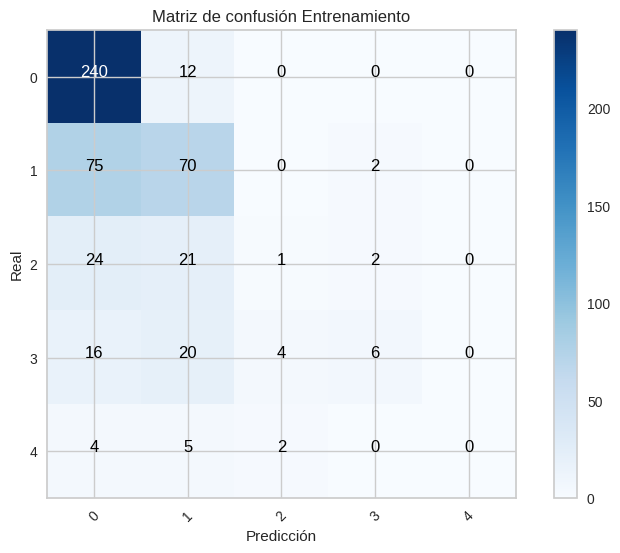

Reporte Prueba
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       108
           1       0.47      0.55      0.51        62
           2       0.33      0.10      0.15        20
           3       0.25      0.05      0.09        19
           4       0.00      0.00      0.00         7

    accuracy                           0.61       216
   macro avg       0.35      0.32      0.31       216
weighted avg       0.54      0.61      0.56       216



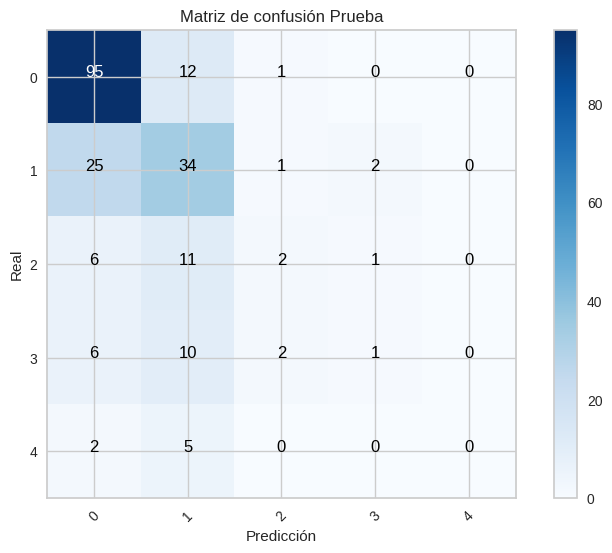

In [92]:
report_and_conf_matrix(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=15)),
                       X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])

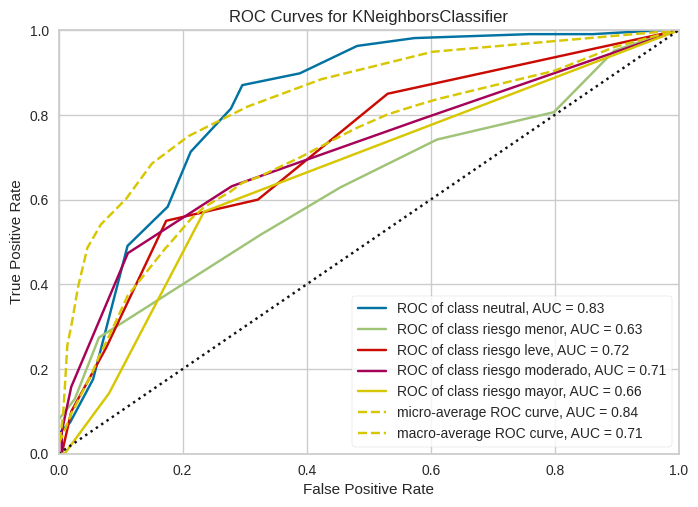

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo menor', 2: 'riesgo leve',
                3: 'riesgo moderado', 4: 'riesgo mayor'},
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('kneighborsclassifier',
                                  KNeighborsClassifier(n_neighbors=15))]))

In [93]:
plot_ROC_curve(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=15)),
                X_train=X_train['rem'][cols], y_train=y_train['rem'],X_test=X_test['rem'][cols], y_test=y_test['rem'])

Presentamos áreas bajo la curva menores que en el ejercicio pasado.

### 7.3 Naive-Bayes



In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

classification_metrics(GaussianNB(),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

Training Accuracy = 0.2837301587301587
Test Accuracy = 0.26851851851851855
Training Kappa = 0.14758768025636448
Test Kappa = 0.13798590588770165
Training Precision = [0.88 0.54 0.   0.29 0.03]
Test Precision = [0.93 0.4  0.33 0.42 0.03]
Training recall = [0.44 0.09 0.   0.15 1.  ]
Test recall = [0.39 0.1  0.05 0.26 0.57]


(GaussianNB(),
 {'Training Accuracy': 0.2837301587301587,
  'Test Accuracy': 0.26851851851851855,
  'Training Kappa': 0.14758768025636448,
  'Test Kappa': 0.13798590588770165,
  'Training Precision': array([0.88, 0.54, 0.  , 0.29, 0.03]),
  'Test Precision': array([0.93, 0.4 , 0.33, 0.42, 0.03]),
  'Training recall': array([0.44, 0.09, 0.  , 0.15, 1.  ]),
  'Test recall': array([0.39, 0.1 , 0.05, 0.26, 0.57])})

In [95]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 cv=5,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train['rem'], y_train['rem'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00e+00, 8.11e-01, 6.58e-01, 5.34e-01, 4.33e-01, 3.51e-01,
       2.85e-01, 2.31e-01, 1.87e-01, 1.52e-01, 1.23e-01, 1.00e-01,
       8.11e-02, 6.58e-02, 5.34e-02, 4.33e-02, 3.51e-02, 2.85e-02,
       2.31e-02, 1.87e-02, 1.52e-02, 1.23e-02, 1.00e-02, 8.11e-03,
       6.58e-03, 5.34e-03, 4.33e-03, 3.51e-03, 2.85e-03, 2.31e-03,
       1.87...
       3.51e-06, 2.85e-06, 2.31e-06, 1.87e-06, 1.52e-06, 1.23e-06,
       1.00e-06, 8.11e-07, 6.58e-07, 5.34e-07, 4.33e-07, 3.51e-07,
       2.85e-07, 2.31e-07, 1.87e-07, 1.52e-07, 1.23e-07, 1.00e-07,
       8.11e-08, 6.58e-08, 5.34e-08, 4.33e-08, 3.51e-08, 2.85e-08,
       2.31e-08, 1.87e-08, 1.52e-08, 1.23e-08, 1.00e-08, 8.11e-09,
       6.58e-09, 5.34e-09, 4.33e-09, 3.51e-09, 2.85e-09, 2.31e-09,
       1.87e-09, 1.52e-09, 1.23e-09, 1.00e-09])},
             scoring='accuracy', verbose=1)

In [96]:
# Mejores hiperparámetros

gs_NB.best_params_

{'var_smoothing': 0.0001}

In [97]:
gs_NB.best_score_

0.6468910891089109

In [98]:
# Guardamos el mejor modelo

model,metrics = classification_metrics(GaussianNB(var_smoothing=0.0001),
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/NBClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierRemMetrics.pkl','wb'))

Training Accuracy = 0.6587301587301587
Test Accuracy = 0.5879629629629629
Training Kappa = 0.4410471339222387
Test Kappa = 0.34067290873546663
Training Precision = [0.77 0.54 0.33 0.41 0.  ]
Test Precision = [0.81 0.4  0.   0.24 0.  ]
Training recall = [0.87 0.64 0.02 0.39 0.  ]
Test recall = [0.81 0.58 0.   0.21 0.  ]


Reporte Entrenamiento
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       252
           1       0.54      0.64      0.59       147
           2       0.33      0.02      0.04        48
           3       0.41      0.39      0.40        46
           4       0.00      0.00      0.00        11

    accuracy                           0.66       504
   macro avg       0.41      0.38      0.37       504
weighted avg       0.61      0.66      0.62       504



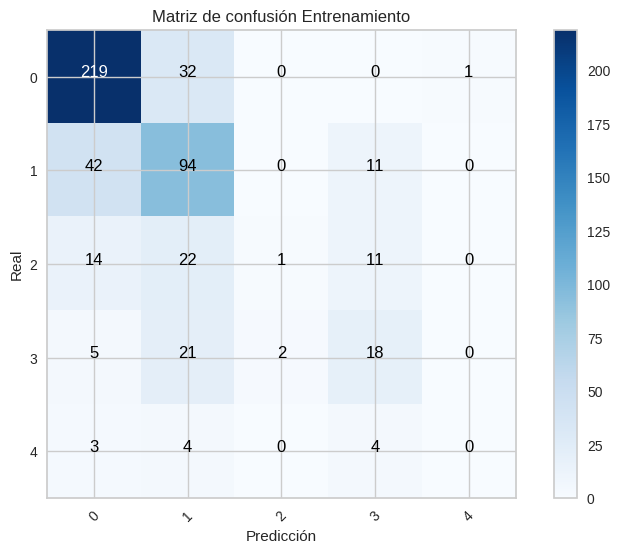

Reporte Prueba
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.40      0.58      0.47        62
           2       0.00      0.00      0.00        20
           3       0.24      0.21      0.22        19
           4       0.00      0.00      0.00         7

    accuracy                           0.59       216
   macro avg       0.29      0.32      0.30       216
weighted avg       0.54      0.59      0.56       216



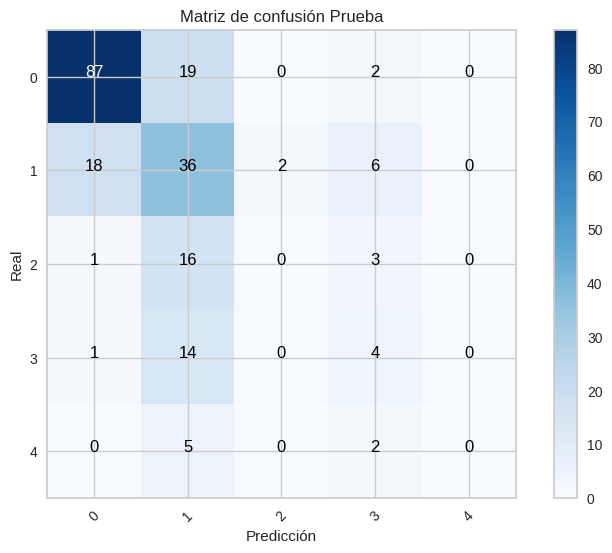

In [99]:
report_and_conf_matrix(GaussianNB(var_smoothing=0.0001),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

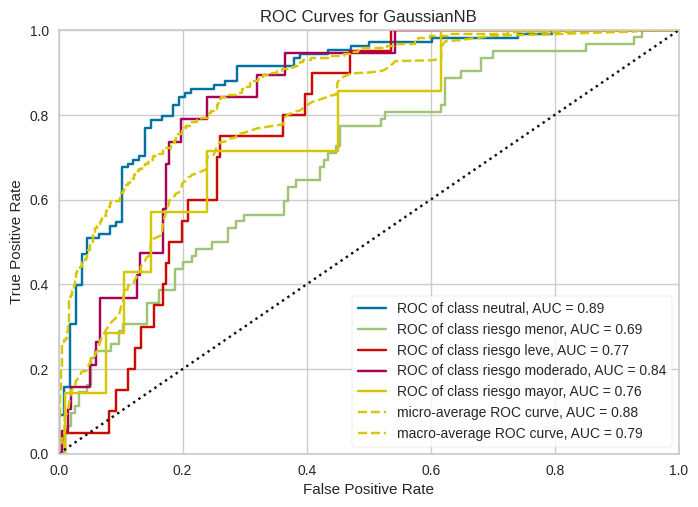

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo menor', 2: 'riesgo leve',
                3: 'riesgo moderado', 4: 'riesgo mayor'},
       estimator=GaussianNB(var_smoothing=0.0001))

In [100]:
plot_ROC_curve(GaussianNB(var_smoothing=0.0001),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

Aunque percibimos una mejora en la precisión para la clasificación de riesgo neutral, vemos que los riesgos más altos siguen experimentando mayores erroes de clasificación.

Procedemos a correr el modelo con feature selection

In [101]:
nb_classifier = GaussianNB()

X_t = SelectKBest(score_func=f_classif,k=10).fit_transform(X_train['rem'], y_train['rem'])

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 cv=5,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_t, y_train['rem'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00e+00, 8.11e-01, 6.58e-01, 5.34e-01, 4.33e-01, 3.51e-01,
       2.85e-01, 2.31e-01, 1.87e-01, 1.52e-01, 1.23e-01, 1.00e-01,
       8.11e-02, 6.58e-02, 5.34e-02, 4.33e-02, 3.51e-02, 2.85e-02,
       2.31e-02, 1.87e-02, 1.52e-02, 1.23e-02, 1.00e-02, 8.11e-03,
       6.58e-03, 5.34e-03, 4.33e-03, 3.51e-03, 2.85e-03, 2.31e-03,
       1.87...
       3.51e-06, 2.85e-06, 2.31e-06, 1.87e-06, 1.52e-06, 1.23e-06,
       1.00e-06, 8.11e-07, 6.58e-07, 5.34e-07, 4.33e-07, 3.51e-07,
       2.85e-07, 2.31e-07, 1.87e-07, 1.52e-07, 1.23e-07, 1.00e-07,
       8.11e-08, 6.58e-08, 5.34e-08, 4.33e-08, 3.51e-08, 2.85e-08,
       2.31e-08, 1.87e-08, 1.52e-08, 1.23e-08, 1.00e-08, 8.11e-09,
       6.58e-09, 5.34e-09, 4.33e-09, 3.51e-09, 2.85e-09, 2.31e-09,
       1.87e-09, 1.52e-09, 1.23e-09, 1.00e-09])},
             scoring='accuracy', verbose=1)

In [102]:
gs_NB.best_params_

{'var_smoothing': 3.511191734215127e-05}

In [103]:
gs_NB.best_score_

0.6488316831683167

In [104]:
# Guardamos el mejor modelo sin PCA utilizando feature selection

pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=10),
                            GaussianNB(var_smoothing=3.511191734215127e-05))

model,metrics = classification_metrics(pipeline_nb,
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/NBClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierRemFSMetrics.pkl','wb'))

Training Accuracy = 0.6626984126984127
Test Accuracy = 0.6064814814814815
Training Kappa = 0.45371775417298943
Test Kappa = 0.3787853155134495
Training Precision = [0.79 0.56 0.4  0.39 0.  ]
Test Precision = [0.84 0.44 0.   0.21 0.  ]
Training recall = [0.88 0.6  0.04 0.48 0.  ]
Test recall = [0.83 0.58 0.   0.26 0.  ]


Reporte Entrenamiento
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       252
           1       0.56      0.60      0.58       147
           2       0.40      0.04      0.08        48
           3       0.39      0.48      0.43        46
           4       0.00      0.00      0.00        11

    accuracy                           0.66       504
   macro avg       0.43      0.40      0.38       504
weighted avg       0.63      0.66      0.63       504



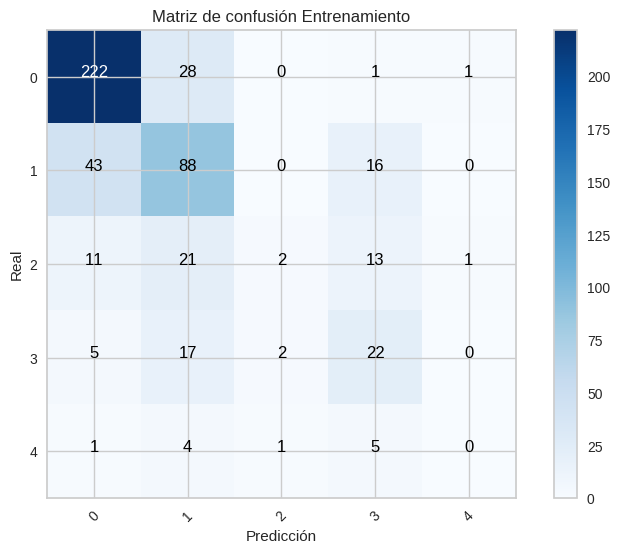

Reporte Prueba
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       108
           1       0.44      0.58      0.50        62
           2       0.00      0.00      0.00        20
           3       0.21      0.26      0.23        19
           4       0.00      0.00      0.00         7

    accuracy                           0.61       216
   macro avg       0.30      0.34      0.31       216
weighted avg       0.57      0.61      0.58       216



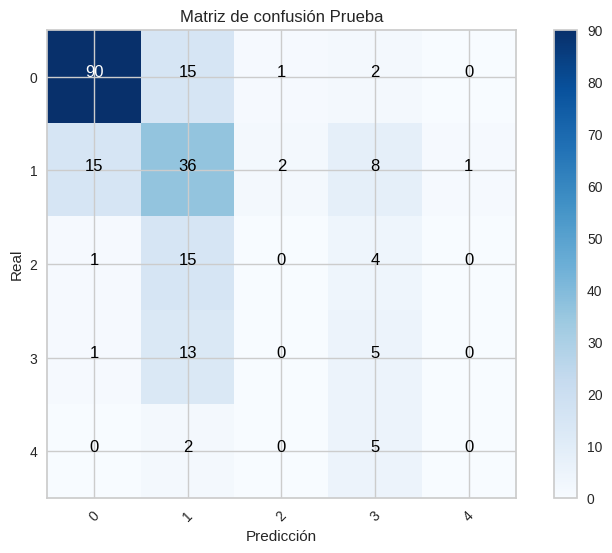

In [105]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=10),
                            GaussianNB(var_smoothing=3.511191734215127e-05))
report_and_conf_matrix(pipeline_nb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

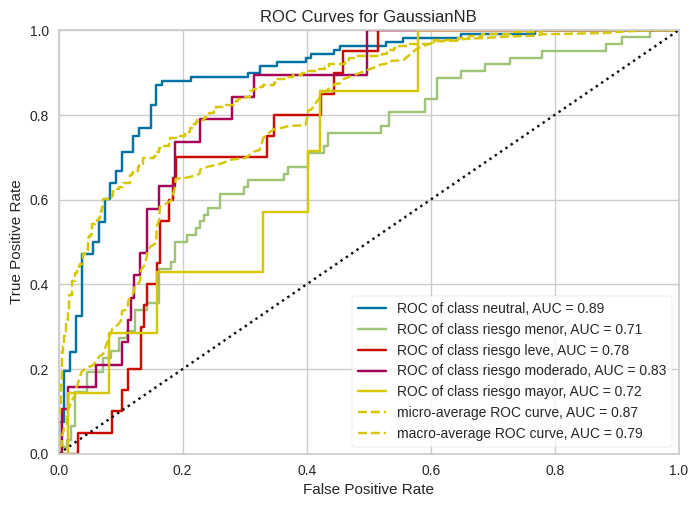

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo menor', 2: 'riesgo leve',
                3: 'riesgo moderado', 4: 'riesgo mayor'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                 ('gaussiannb',
                                  GaussianNB(var_smoothing=3.511191734215127e-05))]))

In [106]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=10),
                            GaussianNB(var_smoothing=3.511191734215127e-05))
plot_ROC_curve(pipeline_nb,X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

### 7.4. Árbol de clasificación

Construimos el árbol de clasificación

Training Accuracy = 1.0
Test Accuracy = 0.6018518518518519
Training Kappa = 1.0
Test Kappa = 0.39270302079246766
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.78 0.56 0.24 0.22 0.5 ]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.76 0.56 0.3  0.21 0.43]
DecisionTreeClassifier(random_state=1234)


[Text(0.5, 0.9, 'x[2] <= 3.5\ngini = 0.647\nsamples = 504\nvalue = [252, 147, 48, 46, 11]'),
 Text(0.25, 0.7, 'x[4] <= 156.5\ngini = 0.367\nsamples = 257\nvalue = [200, 41, 7, 7, 2]'),
 Text(0.125, 0.5, 'x[7] <= 132.5\ngini = 0.705\nsamples = 24\nvalue = [8, 9, 3, 4, 0]'),
 Text(0.0625, 0.3, 'x[7] <= 96.0\ngini = 0.643\nsamples = 14\nvalue = [1, 7, 2, 4, 0]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[2] <= 1.5\ngini = 0.46\nsamples = 10\nvalue = [7, 2, 1, 0, 0]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[9] <= 1.7\ngini = 0.302\nsamples = 233\nvalue = [192, 32, 4, 3, 2]'),
 Text(0.3125, 0.3, 'x[4] <= 228.0\ngini = 0.232\nsamples = 205\nvalue = [178, 24, 2, 1, 0]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[4] <= 260.5\ngini = 0.653\nsamples = 28\nvalue = [14, 8, 2, 2, 2]'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.

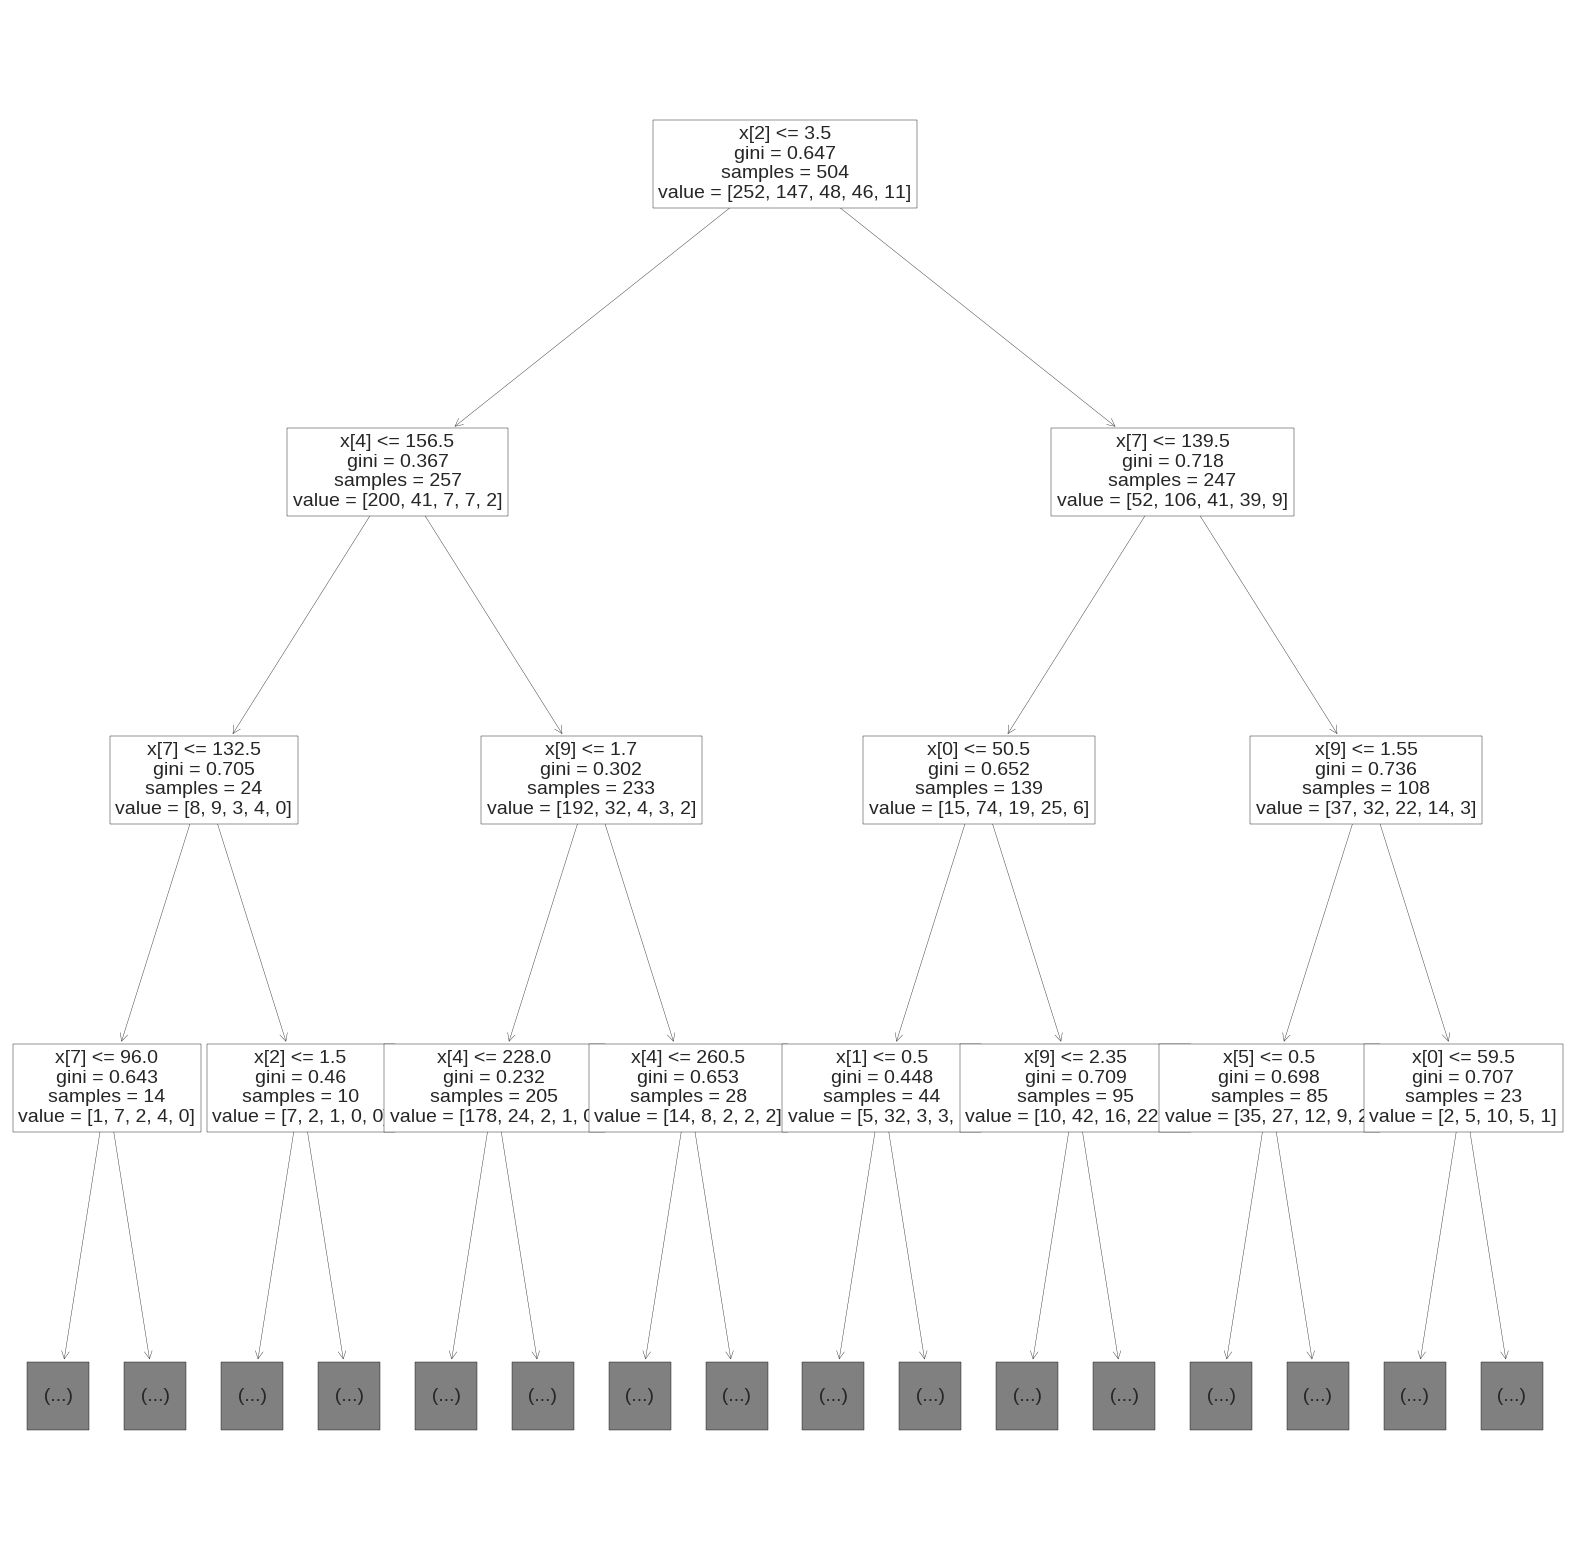

In [108]:
# Utilizamos un árbol de clasificación
# Verificamos sus métricas

from sklearn.tree import DecisionTreeClassifier, plot_tree

classification_metrics(DecisionTreeClassifier(random_state=1234),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

tree_reg = DecisionTreeClassifier(random_state=1234).fit(X_train['rem'],y_train['rem'])
print(tree_reg)

# Diagramamos los primeros tres niveles del árbol resultante

plt.figure(figsize=(20,20))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)

In [109]:
# Vamos a realizar un ajuste de hiperparámetros para encontrar el mejor modelo de árbol de clasificación
# Establecemos la grilla de parámetros que verificar
# Haciendo uso de estos parámetros y una validación cruzada de 3 doblajes buscamos el mejor modelo
# Tiempo aprox = 04s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

kappa_scorer = make_scorer(cohen_kappa_score)
tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),
                          param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_train['rem'],y_train['rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.366 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.324 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.353 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.366 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.324 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(cohen_kappa_score), verbose=3)

In [110]:
# Los híperparámetros del mejor modelo

tuning_model.best_params_

{'max_depth': 1,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [112]:
# El mejor modelo de árbol de clasificación sin PCA


tree_clsfr = DecisionTreeClassifier(random_state=1234,max_depth=1,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best')

model,metrics = classification_metrics(tree_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/DecissionTreeClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierRemMetrics.pkl','wb'))

Training Accuracy = 0.6071428571428571
Test Accuracy = 0.5925925925925926
Training Kappa = 0.3475216257036935
Test Kappa = 0.3389901238002503
Training Precision = [0.78 0.43 0.   0.   0.  ]
Test Precision = [0.81 0.42 0.   0.   0.  ]
Training recall = [0.79 0.72 0.   0.   0.  ]
Test recall = [0.73 0.79 0.   0.   0.  ]


Reporte Entrenamiento
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       252
           1       0.43      0.72      0.54       147
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        46
           4       0.00      0.00      0.00        11

    accuracy                           0.61       504
   macro avg       0.24      0.30      0.26       504
weighted avg       0.51      0.61      0.55       504



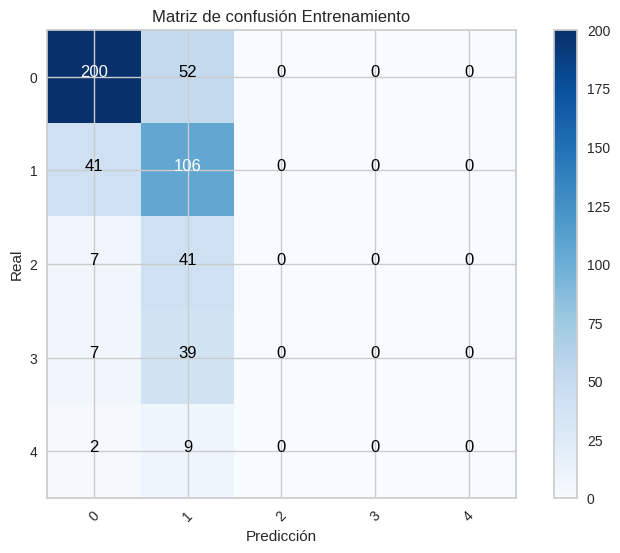

Reporte Prueba
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       108
           1       0.42      0.79      0.54        62
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         7

    accuracy                           0.59       216
   macro avg       0.24      0.30      0.26       216
weighted avg       0.52      0.59      0.54       216



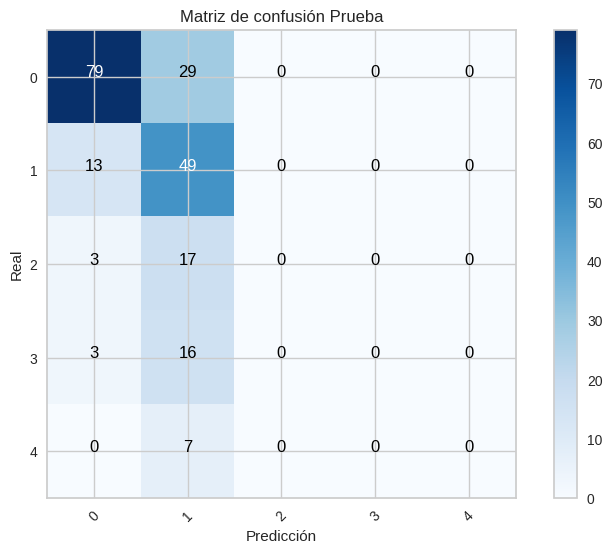

In [113]:
report_and_conf_matrix(DecisionTreeClassifier(random_state=1234,max_depth=1,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best'),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

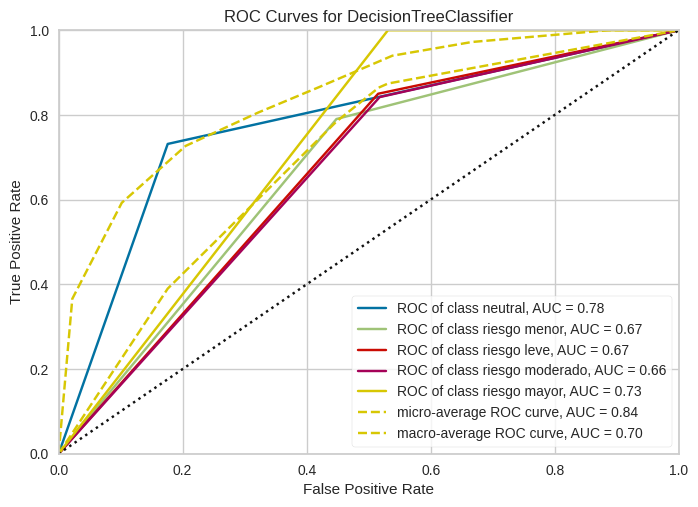

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo menor', 2: 'riesgo leve',
                3: 'riesgo moderado', 4: 'riesgo mayor'},
       estimator=DecisionTreeClassifier(max_depth=1, random_state=1234))

In [114]:
plot_ROC_curve(DecisionTreeClassifier(random_state=1234,max_depth=1,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best'),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])